In [193]:
%cd /rna/junyoung/prj/class/binfo1-work

/rna/junyoung/prj/class/binfo1-work


In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
import gseapy as gp
import networkx as nx
from gprofiler import GProfiler
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable, get_cmap
from matplotlib import font_manager
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

font_dirs = ['/rna/junyoung/prj/helvetica-rmagid']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
mpl.rcParams['font.family'] = 'Helvetica'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
gp2 = GProfiler(return_dataframe=True)
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
print(len(cnts))
cnts.head()

55359


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,0,0,0,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,0,0,0


In [195]:
readcounts = 10
cnts_presorted = cnts.loc[(cnts['CLIP-35L33G.bam'] > readcounts) &
                          (cnts['RNA-control.bam'] > readcounts) &
                          (cnts['RNA-siLin28a.bam'] > readcounts) &
                          (cnts['RNA-siLuc.bam'] > readcounts) & 
                          (cnts['RPF-siLin28a.bam'] > readcounts) &
                          (cnts['RPF-siLuc.bam'] > readcounts)]
cnts_presorted

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,0,0,0,74,95,93,100,42,75
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,0,0,0,3,1355,3022,2563,1859,3191
ENSMUSG00000025903.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,0,0,44,574,1219,1236,33,44
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,0,0,0,607,762,2130,2225,328,609
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,0,0,0,1121,474,1260,1031,603,1128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064367.1,chrM,11742,13565,+,1824,3665,0,0,0,4764,5281,15549,17408,5986,5305
ENSMUSG00000064368.1,chrM,13552,14070,-,519,1666,0,0,0,27,1976,6741,8052,11471,10842
ENSMUSG00000064369.1,chrM,14071,14139,-,69,81,0,0,0,2,61,30,25,18,19


In [196]:
total_counts = cnts_presorted.iloc[:,5:15]
total_counts.head()

,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,
ENSMUSG00000103922.2,183,0,0,0,74,95,93,100,42,75
ENSMUSG00000033845.14,4014,0,0,0,3,1355,3022,2563,1859,3191
ENSMUSG00000025903.15,2045,0,0,0,44,574,1219,1236,33,44
ENSMUSG00000033813.16,1658,0,0,0,607,762,2130,2225,328,609
ENSMUSG00000033793.13,1111,0,0,0,1121,474,1260,1031,603,1128


In [197]:
rpm = total_counts.divide(total_counts.sum(axis=0)) * 1e6
rpm.head()

,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,
ENSMUSG00000103922.2,13.861808,NaN,NaN,NaN,8.208091,19.382031,7.693224,10.470116,4.041636,5.970216
ENSMUSG00000033845.14,304.050807,NaN,NaN,NaN,0.332760,276.448975,249.988419,268.349061,178.890515,254.012781
ENSMUSG00000025903.15,154.903812,NaN,NaN,NaN,4.880486,117.108274,100.839140,129.410628,3.175571,3.502527
ENSMUSG00000033813.16,125.589496,NaN,NaN,NaN,67.328527,155.464295,176.199647,232.960070,31.563254,48.478152
ENSMUSG00000033793.13,84.155567,NaN,NaN,NaN,124.341481,96.706136,104.230777,107.946891,58.026348,89.792045


In [198]:
cnts_presorted.iloc[:,5:15] = rpm
cnts_presorted

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,13.861808,NaN,NaN,NaN,8.208091,19.382031,7.693224,10.470116,4.041636,5.970216
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,304.050807,NaN,NaN,NaN,0.332760,276.448975,249.988419,268.349061,178.890515,254.012781
ENSMUSG00000025903.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,154.903812,NaN,NaN,NaN,4.880486,117.108274,100.839140,129.410628,3.175571,3.502527
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,125.589496,NaN,NaN,NaN,67.328527,155.464295,176.199647,232.960070,31.563254,48.478152
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,84.155567,NaN,NaN,NaN,124.341481,96.706136,104.230777,107.946891,58.026348,89.792045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064367.1,chrM,11742,13565,+,1824,277.614899,NaN,NaN,NaN,528.423564,1077.436928,1286.257420,1822.637709,576.029383,422.293263
ENSMUSG00000064368.1,chrM,13552,14070,-,519,126.195477,NaN,NaN,NaN,2.994844,403.146255,557.634656,843.053701,1103.847820,863.054394
ENSMUSG00000064369.1,chrM,14071,14139,-,69,6.135554,NaN,NaN,NaN,0.221840,12.445304,2.481685,2.617529,1.732130,1.512455


In [199]:
rpm_count = 10
cnts_sorted = cnts_presorted.loc[(cnts_presorted['RNA-control.bam'] > rpm_count) &
                       (cnts_presorted['RNA-siLin28a.bam'] > rpm_count) & 
                       (cnts_presorted['RNA-siLuc.bam'] > rpm_count) &
                       (cnts_presorted['RPF-siLin28a.bam'] > rpm_count) &
                       (cnts_presorted['RPF-siLuc.bam'] > rpm_count)
                       ]
cnts_sorted

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,304.050807,NaN,NaN,NaN,0.332760,276.448975,249.988419,268.349061,178.890515,254.012781
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,125.589496,NaN,NaN,NaN,67.328527,155.464295,176.199647,232.960070,31.563254,48.478152
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,84.155567,NaN,NaN,NaN,124.341481,96.706136,104.230777,107.946891,58.026348,89.792045
ENSMUSG00000025907.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,6276421;6276451;6284869;6284887;6285232;629382...,6276494;6276494;6285181;6285181;6285476;629396...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,14690,115.136329,NaN,NaN,NaN,27.840956,57.125987,57.409650,94.545143,12.702285,19.980322
ENSMUSG00000051285.18,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,7159144;7159154;7159328;7159390;7190418;721786...,7159440;7159440;7159440;7159440;7190839;721796...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,6654,265.722529,NaN,NaN,NaN,15.196060,107.927312,195.225900,185.844550,20.015722,10.985197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064351.1,chrM,5328,6872,+,1545,40.373463,NaN,NaN,NaN,1909.268432,3394.507785,4183.790294,4128.366548,2045.164129,1381.507933
ENSMUSG00000064363.1,chrM,10167,11544,+,1378,28.253849,NaN,NaN,NaN,267.428466,438.645975,415.930433,442.257679,316.787292,198.847987
ENSMUSG00000064367.1,chrM,11742,13565,+,1824,277.614899,NaN,NaN,NaN,528.423564,1077.436928,1286.257420,1822.637709,576.029383,422.293263


In [200]:
total_gene_list = cnts_sorted.index.str.split('.').str[0].copy()
total_gene_list = total_gene_list.tolist()
total_gene_list[:5]
print(len(total_gene_list))
total_gene_list

6042


['ENSMUSG00000033845',
 'ENSMUSG00000033813',
 'ENSMUSG00000033793',
 'ENSMUSG00000025907',
 'ENSMUSG00000051285',
 'ENSMUSG00000061024',
 'ENSMUSG00000045210',
 'ENSMUSG00000098234',
 'ENSMUSG00000025917',
 'ENSMUSG00000056763',
 'ENSMUSG00000067851',
 'ENSMUSG00000016918',
 'ENSMUSG00000042414',
 'ENSMUSG00000005886',
 'ENSMUSG00000025935',
 'ENSMUSG00000025937',
 'ENSMUSG00000025925',
 'ENSMUSG00000043716',
 'ENSMUSG00000079658',
 'ENSMUSG00000025940',
 'ENSMUSG00000041859',
 'ENSMUSG00000025931',
 'ENSMUSG00000041779',
 'ENSMUSG00000026155',
 'ENSMUSG00000026154',
 'ENSMUSG00000026153',
 'ENSMUSG00000067736',
 'ENSMUSG00000101111',
 'ENSMUSG00000100862',
 'ENSMUSG00000102070',
 'ENSMUSG00000073725',
 'ENSMUSG00000048874',
 'ENSMUSG00000026134',
 'ENSMUSG00000004768',
 'ENSMUSG00000042197',
 'ENSMUSG00000026131',
 'ENSMUSG00000042111',
 'ENSMUSG00000026127',
 'ENSMUSG00000037503',
 'ENSMUSG00000026123',
 'ENSMUSG00000045216',
 'ENSMUSG00000037470',
 'ENSMUSG00000010453',
 'ENSMUSG00

In [201]:
total_gene_table = pd.concat([pd.Series(cnts_sorted.index.tolist()), pd.Series(total_gene_list)],axis=1, ignore_index=True)
total_gene_table = total_gene_table.set_index([0])
total_gene_table

,1
0,
ENSMUSG00000033845.14,ENSMUSG00000033845
ENSMUSG00000033813.16,ENSMUSG00000033813
ENSMUSG00000033793.13,ENSMUSG00000033793
ENSMUSG00000025907.15,ENSMUSG00000025907
ENSMUSG00000051285.18,ENSMUSG00000051285
...,...
ENSMUSG00000064351.1,ENSMUSG00000064351
ENSMUSG00000064363.1,ENSMUSG00000064363
ENSMUSG00000064367.1,ENSMUSG00000064367


In [202]:
cnts_sorted['clip_enrichment'] = cnts_sorted['CLIP-35L33G.bam']/cnts_sorted['RNA-control.bam'].copy()
cnts_sorted['rden_change'] = (cnts_sorted['RPF-siLin28a.bam']/cnts_sorted['RNA-siLin28a.bam']) / (cnts_sorted['RPF-siLuc.bam']/cnts_sorted['RNA-siLuc.bam']).copy()
cnts_sorted

/tmp/ipykernel_4145512/123156294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnts_sorted['clip_enrichment'] = cnts_sorted['CLIP-35L33G.bam']/cnts_sorted['RNA-control.bam'].copy()
/tmp/ipykernel_4145512/123156294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnts_sorted['rden_change'] = (cnts_sorted['RPF-siLin28a.bam']/cnts_sorted['RNA-siLin28a.bam']) / (cnts_sorted['RPF-siLuc.bam']/cnts_sorted['RNA-siLuc.bam']).copy()


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,,,,,
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,304.050807,NaN,NaN,NaN,0.332760,276.448975,249.988419,268.349061,178.890515,254.012781,1.099844,0.755983
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,125.589496,NaN,NaN,NaN,67.328527,155.464295,176.199647,232.960070,31.563254,48.478152,0.807835,0.860820
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,84.155567,NaN,NaN,NaN,124.341481,96.706136,104.230777,107.946891,58.026348,89.792045,0.870220,0.669270
ENSMUSG00000025907.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,6276421;6276451;6284869;6284887;6285232;629382...,6276494;6276494;6285181;6285181;6285476;629396...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,14690,115.136329,NaN,NaN,NaN,27.840956,57.125987,57.409650,94.545143,12.702285,19.980322,2.015481,1.046969
ENSMUSG00000051285.18,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,7159144;7159154;7159328;7159390;7190418;721786...,7159440;7159440;7159440;7159440;7190839;721796...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,6654,265.722529,NaN,NaN,NaN,15.196060,107.927312,195.225900,185.844550,20.015722,10.985197,2.462051,1.734506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064351.1,chrM,5328,6872,+,1545,40.373463,NaN,NaN,NaN,1909.268432,3394.507785,4183.790294,4128.366548,2045.164129,1381.507933,0.011894,1.460774
ENSMUSG00000064363.1,chrM,10167,11544,+,1378,28.253849,NaN,NaN,NaN,267.428466,438.645975,415.930433,442.257679,316.787292,198.847987,0.064412,1.693953
ENSMUSG00000064367.1,chrM,11742,13565,+,1824,277.614899,NaN,NaN,NaN,528.423564,1077.436928,1286.257420,1822.637709,576.029383,422.293263,0.257662,1.932871


In [203]:
def batched(iterable, n): 
    items = []
    for item in iterable:
        items.append(item)
        if len(items) == n:
            yield items
            items = []
    if items:
        yield items

bm = gp.biomart.Biomart()
result = []

for batch in batched(total_gene_list, 300):
    res = bm.query(dataset='mmusculus_gene_ensembl',
                   attributes=['ensembl_gene_id', 'external_gene_name'],
                   filters={'ensembl_gene_id': batch})
    result.append(res)

result = pd.concat(result)
result

,ensembl_gene_id,external_gene_name
0,ENSMUSG00000001138,Cnnm3
1,ENSMUSG00000001143,Lman2l
2,ENSMUSG00000001674,Ddx18
3,ENSMUSG00000003051,Elf3
4,ENSMUSG00000003135,Cnot11
...,...,...
37,ENSMUSG00000068457,Uty
38,ENSMUSG00000069045,Ddx3y
39,ENSMUSG00000069049,Eif2s3y
40,ENSMUSG00000079316,Rab9


In [204]:
results = result.sort_values(by=['ensembl_gene_id'])
results = results.set_index('ensembl_gene_id')
results['external_gene_name'] = results['external_gene_name'].str.upper().drop_duplicates()
results = results.dropna()
results

,external_gene_name
ensembl_gene_id,
ENSMUSG00000000001,GNAI3
ENSMUSG00000000028,CDC45
ENSMUSG00000000056,NARF
ENSMUSG00000000078,KLF6
ENSMUSG00000000088,COX5A
...,...
ENSMUSG00000118671,EPPK1
ENSMUSG00000119584,RN18S-RS5
ENSMUSG00000119730,N-R5S106


In [205]:
total_genenames = results['external_gene_name'].dropna()
print(len(total_genenames))
total_genenames

6042


ensembl_gene_id
ENSMUSG00000000001        GNAI3
ENSMUSG00000000028        CDC45
ENSMUSG00000000056         NARF
ENSMUSG00000000078         KLF6
ENSMUSG00000000088        COX5A
                        ...    
ENSMUSG00000118671        EPPK1
ENSMUSG00000119584    RN18S-RS5
ENSMUSG00000119730     N-R5S106
ENSMUSG00002075637      GM55073
ENSMUSG00002075795      GM54867
Name: external_gene_name, Length: 6042, dtype: object

In [206]:
cnts_ascending = pd.merge(total_gene_table, cnts_sorted, left_index=True, right_index=True, how='inner')
cnts_ascending = cnts_ascending.sort_values(by=[1])
cnts_ascending = cnts_ascending.set_index([1])
cnts_ascending

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
1,,,,,,,,,,,,,,,,,
ENSMUSG00000000001,chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3,108014596;108016719;108019251;108019789;108023...,108016632;108016928;108019404;108019918;108023...,-;-;-;-;-;-;-;-;-,3262,150.055966,NaN,NaN,NaN,0.000000,146.283332,123.339753,190.241999,32.814236,51.901076,1.025790,0.975190
ENSMUSG00000000028,chr16;chr16;chr16;chr16;chr16;chr16;chr16;chr1...,18599197;18599203;18600646;18600646;18603556;1...,18599323;18599323;18600712;18600712;18603632;1...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,3506,38.555521,NaN,NaN,NaN,0.000000,102.622756,85.287247,99.989603,21.362934,31.363534,0.375701,0.798558
ENSMUSG00000000056,chr11;chr11;chr11;chr11;chr11;chr11;chr11;chr1...,121128079;121129245;121133327;121135364;121135...,121128177;121129343;121133470;121135552;121135...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,4806,17.952178,NaN,NaN,NaN,19.854706,40.192213,37.804337,40.100542,12.798515,14.248915,0.446658,0.952766
ENSMUSG00000000078,chr13;chr13;chr13;chr13;chr13;chr13;chr13;chr1...,5911481;5911540;5913557;5914677;5914767;591476...,5911841;5911841;5913624;5915343;5915343;591534...,+;+;+;+;+;+;+;+;+;+;+,4391,45.448551,NaN,NaN,NaN,16.416181,35.295699,38.217952,45.545002,12.317367,11.860829,1.287651,1.237588
ENSMUSG00000000088,chr9;chr9;chr9;chr9;chr9;chr9;chr9;chr9;chr9;c...,57428557;57428562;57428616;57436239;57436239;5...,57428698;57428698;57428698;57436355;57436355;5...,+;+;+;+;+;+;+;+;+;+;+;+,2101,72.338944,NaN,NaN,NaN,252.565167,143.223011,94.221313,76.431843,235.762110,181.414957,0.505079,1.054207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000118671,chr15;chr15;chr15,75973330;75988903;76003309,75976551;75996925;76004395,-;-;-,12332,28.253849,NaN,NaN,NaN,0.000000,21.422245,41.857756,24.185967,17.128839,16.557398,1.318902,0.597755
ENSMUSG00000119584,chr17,40157244,40159092,+,1849,185683.009536,NaN,NaN,NaN,612199.551994,24428.296379,17745.537930,24867.885465,452106.852007,440319.971725,7.601144,1.438873
ENSMUSG00000119730,chr8,124275695,124275813,-,119,177.173602,NaN,NaN,NaN,0.000000,24.686587,20.184373,41.356956,51.290288,105.951430,7.176918,0.991886


In [207]:
total_results = pd.merge(results, cnts_ascending, left_index=True, right_index=True, how='inner')
total_results

,external_gene_name,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
ensembl_gene_id,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001,GNAI3,chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3,108014596;108016719;108019251;108019789;108023...,108016632;108016928;108019404;108019918;108023...,-;-;-;-;-;-;-;-;-,3262,150.055966,NaN,NaN,NaN,0.000000,146.283332,123.339753,190.241999,32.814236,51.901076,1.025790,0.975190
ENSMUSG00000000028,CDC45,chr16;chr16;chr16;chr16;chr16;chr16;chr16;chr1...,18599197;18599203;18600646;18600646;18603556;1...,18599323;18599323;18600712;18600712;18603632;1...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,3506,38.555521,NaN,NaN,NaN,0.000000,102.622756,85.287247,99.989603,21.362934,31.363534,0.375701,0.798558
ENSMUSG00000000056,NARF,chr11;chr11;chr11;chr11;chr11;chr11;chr11;chr1...,121128079;121129245;121133327;121135364;121135...,121128177;121129343;121133470;121135552;121135...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,4806,17.952178,NaN,NaN,NaN,19.854706,40.192213,37.804337,40.100542,12.798515,14.248915,0.446658,0.952766
ENSMUSG00000000078,KLF6,chr13;chr13;chr13;chr13;chr13;chr13;chr13;chr1...,5911481;5911540;5913557;5914677;5914767;591476...,5911841;5911841;5913624;5915343;5915343;591534...,+;+;+;+;+;+;+;+;+;+;+,4391,45.448551,NaN,NaN,NaN,16.416181,35.295699,38.217952,45.545002,12.317367,11.860829,1.287651,1.237588
ENSMUSG00000000088,COX5A,chr9;chr9;chr9;chr9;chr9;chr9;chr9;chr9;chr9;c...,57428557;57428562;57428616;57436239;57436239;5...,57428698;57428698;57428698;57436355;57436355;5...,+;+;+;+;+;+;+;+;+;+;+;+,2101,72.338944,NaN,NaN,NaN,252.565167,143.223011,94.221313,76.431843,235.762110,181.414957,0.505079,1.054207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000118671,EPPK1,chr15;chr15;chr15,75973330;75988903;76003309,75976551;75996925;76004395,-;-;-,12332,28.253849,NaN,NaN,NaN,0.000000,21.422245,41.857756,24.185967,17.128839,16.557398,1.318902,0.597755
ENSMUSG00000119584,RN18S-RS5,chr17,40157244,40159092,+,1849,185683.009536,NaN,NaN,NaN,612199.551994,24428.296379,17745.537930,24867.885465,452106.852007,440319.971725,7.601144,1.438873
ENSMUSG00000119730,N-R5S106,chr8,124275695,124275813,-,119,177.173602,NaN,NaN,NaN,0.000000,24.686587,20.184373,41.356956,51.290288,105.951430,7.176918,0.991886


In [208]:
preranked_clip = total_results.iloc[:,[0,16]].copy()
preranked_clip['external_gene_name'] = preranked_clip['external_gene_name'].str.upper().dropna().drop_duplicates()
preranked_clip = preranked_clip.sort_values(by='clip_enrichment', ascending = False).dropna()
preranked_clip =  preranked_clip.reset_index(drop=True)
preranked_clip['log2FC_clip_enrichment'] = np.log2(preranked_clip['clip_enrichment']).copy()
preranked_clip = preranked_clip.drop('clip_enrichment', axis=1)
preranked_clip

,external_gene_name,log2FC_clip_enrichment
0,MT-TL1,5.559009
1,NCBP3,5.055157
2,PGRMC1,4.032009
3,NECTIN3,2.941650
4,RN18S-RS5,2.926217
...,...,...
6037,FAU,-5.359660
6038,GM28661,-5.815767
6039,GM4149,-5.975354
6040,MT-CO1,-6.393651


In [209]:
preranked_rdc = total_results.iloc[:,[0,17]].copy()
preranked_rdc['external_gene_name'] = preranked_rdc['external_gene_name'].str.upper().dropna().drop_duplicates()
preranked_rdc = preranked_rdc.sort_values(by='rden_change', ascending = False).dropna()
preranked_rdc =  preranked_rdc.reset_index(drop=True)
preranked_rdc['log2FC_rden_change'] = np.log2(preranked_rdc['rden_change']).copy()
preranked_rdc = preranked_rdc.drop('rden_change', axis=1)
preranked_rdc

,external_gene_name,log2FC_rden_change
0,UQCRB,1.504330
1,TMEM47,1.474700
2,TMX1,1.379304
3,MT-RNR2,1.304304
4,LAMP2,1.302815
...,...,...
6037,SART1,-1.772932
6038,UPF1,-1.825457
6039,ENO1,-1.882408
6040,MPP1,-1.916090


In [210]:
GOterm_list = ['glycosaminoglycan metabolic process', 
               'endoplasmic reticulum lumen', 
               'cell surface', 
               'calcium ion binding', 
               'Golgi appartatus', 
               'nucleus', 
               'cytosol', 
               'mitochondrion', 
               'endoplasmic reticulum'
               'extracellular region',
               'endoplasmic reticulum membrane',
               'nucleosome',
               'nucleosome assembly',
               'Golgi membrane',
               'Golgi apparatus part']

In [211]:
term_list = ['endoplasmic ',
             'Golgi ']

In [259]:
gp.get_library_name(organism='Mouse')

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbatio

Nonranked GO term analysis with Gseapy

In [212]:
enr = gp.enrichr(gene_list=total_genenames,
                 gene_sets=['GO_Cellular_Component_2023'],
                 organism='Mouse',
                 outdir= None,
                 cutoff=0.1)
enr.res2d.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Cellular_Component_2023,Intracellular Membrane-Bounded Organelle (GO:0...,2254/5175,1.789416e-125,8.016582e-123,0,0,2.248347,645.818128,ITSN2;ATF1;ATF2;POP7;SLC4A1AP;TFRC;ITSN1;NOC2L...
1,GO_Cellular_Component_2023,Nucleus (GO:0005634),1971/4487,1.742909e-109,3.904117e-107,0,0,2.201795,551.387131,ATF1;ATF2;POP7;NOC2L;ALKBH5;ALKBH1;GPBP1;PWWP2...
2,GO_Cellular_Component_2023,Intracellular Non-Membrane-Bounded Organelle (...,658/1195,6.201427e-76,9.260797e-74,0,0,3.054439,528.942328,RPL4;MDC1;POP5;RPL5;POP7;RPL3;POP1;POP4;RPL34;...
3,GO_Cellular_Component_2023,Nucleolus (GO:0005730),459/771,3.025832e-66,3.388932e-64,0,0,3.595803,542.475099,RPL4;POP5;RPL5;POP7;RPL3;POP1;POP4;RPL34;RRP1;...
4,GO_Cellular_Component_2023,Nuclear Lumen (GO:0031981),462/780,1.004173e-65,8.997389e-64,0,0,3.551363,531.510672,RPL4;POP5;RPL5;POP7;RPL3;POP1;POP4;RPL34;RRP1;...


In [213]:
term_table_expanded_nonrank = enr.res2d.set_index('Term')['Genes'].str.split(';', expand=True).stack().reset_index(name='external_gene_name')
term_table_expanded_nonrank

,Term,level_1,external_gene_name
0,Intracellular Membrane-Bounded Organelle (GO:0...,0,ITSN2
1,Intracellular Membrane-Bounded Organelle (GO:0...,1,ATF1
2,Intracellular Membrane-Bounded Organelle (GO:0...,2,ATF2
3,Intracellular Membrane-Bounded Organelle (GO:0...,3,POP7
4,Intracellular Membrane-Bounded Organelle (GO:0...,4,SLC4A1AP
...,...,...,...
18504,Potassium Channel Complex (GO:0034705),1,GRIK3
18505,Potassium Channel Complex (GO:0034705),2,KCNK1
18506,Keratin Filament (GO:0045095),0,EPPK1
18507,Voltage-Gated Potassium Channel Complex (GO:00...,0,KCNK1


In [214]:
term_table_expanded_merged_nonrank = pd.merge(term_table_expanded_nonrank, enr.res2d, on='Term', how='inner')
term_table_expanded_merged_nonrank

,Term,level_1,external_gene_name,Gene_set,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Intracellular Membrane-Bounded Organelle (GO:0...,0,ITSN2,GO_Cellular_Component_2023,2254/5175,1.789416e-125,8.016582e-123,0,0,2.248347,6.458181e+02,ITSN2;ATF1;ATF2;POP7;SLC4A1AP;TFRC;ITSN1;NOC2L...
1,Intracellular Membrane-Bounded Organelle (GO:0...,1,ATF1,GO_Cellular_Component_2023,2254/5175,1.789416e-125,8.016582e-123,0,0,2.248347,6.458181e+02,ITSN2;ATF1;ATF2;POP7;SLC4A1AP;TFRC;ITSN1;NOC2L...
2,Intracellular Membrane-Bounded Organelle (GO:0...,2,ATF2,GO_Cellular_Component_2023,2254/5175,1.789416e-125,8.016582e-123,0,0,2.248347,6.458181e+02,ITSN2;ATF1;ATF2;POP7;SLC4A1AP;TFRC;ITSN1;NOC2L...
3,Intracellular Membrane-Bounded Organelle (GO:0...,3,POP7,GO_Cellular_Component_2023,2254/5175,1.789416e-125,8.016582e-123,0,0,2.248347,6.458181e+02,ITSN2;ATF1;ATF2;POP7;SLC4A1AP;TFRC;ITSN1;NOC2L...
4,Intracellular Membrane-Bounded Organelle (GO:0...,4,SLC4A1AP,GO_Cellular_Component_2023,2254/5175,1.789416e-125,8.016582e-123,0,0,2.248347,6.458181e+02,ITSN2;ATF1;ATF2;POP7;SLC4A1AP;TFRC;ITSN1;NOC2L...
...,...,...,...,...,...,...,...,...,...,...,...,...
18504,Potassium Channel Complex (GO:0034705),1,GRIK3,GO_Cellular_Component_2023,3/81,9.999959e-01,9.999966e-01,0,0,0.088400,3.595911e-07,AKAP9;GRIK3;KCNK1
18505,Potassium Channel Complex (GO:0034705),2,KCNK1,GO_Cellular_Component_2023,3/81,9.999959e-01,9.999966e-01,0,0,0.088400,3.595911e-07,AKAP9;GRIK3;KCNK1
18506,Keratin Filament (GO:0045095),0,EPPK1,GO_Cellular_Component_2023,1/39,9.999961e-01,9.999966e-01,0,0,0.060638,2.386471e-07,EPPK1
18507,Voltage-Gated Potassium Channel Complex (GO:00...,0,KCNK1,GO_Cellular_Component_2023,1/73,9.999961e-01,9.999966e-01,0,0,0.031925,1.254112e-07,KCNK1


In [215]:
merged_table_nonrank = pd.merge(term_table_expanded_merged_nonrank, total_results, on='external_gene_name')
merged_table_nonrank['log2FC_clip_enrichment'] = np.log2(merged_table_nonrank['clip_enrichment'])
merged_table_nonrank['log2FC_rden_change'] = np.log2(merged_table_nonrank['rden_change'])
merged_table_nonrank

,Term,level_1,external_gene_name,Gene_set,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,...,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,log2FC_clip_enrichment,log2FC_rden_change
0,Intracellular Membrane-Bounded Organelle (GO:0...,0,ITSN2,GO_Cellular_Component_2023,2254/5175,1.789416e-125,8.016582e-123,0,0,2.248347,...,67.439447,63.042608,96.620276,85.017338,75.925022,48.637358,1.384163,1.373581,0.469013,0.457942
1,Vesicle (GO:0031982),0,ITSN2,GO_Cellular_Component_2023,97/235,1.897168e-04,7.142281e-04,0,0,1.633988,...,67.439447,63.042608,96.620276,85.017338,75.925022,48.637358,1.384163,1.373581,0.469013,0.457942
2,Intracellular Vesicle (GO:0097708),0,ITSN2,GO_Cellular_Component_2023,3/11,6.926895e-01,8.644148e-01,0,0,0.866244,...,67.439447,63.042608,96.620276,85.017338,75.925022,48.637358,1.384163,1.373581,0.469013,0.457942
3,Intracellular Membrane-Bounded Organelle (GO:0...,1,ATF1,GO_Cellular_Component_2023,2254/5175,1.789416e-125,8.016582e-123,0,0,2.248347,...,40.929533,82.016596,65.681934,80.619889,32.718007,29.532667,0.606782,1.359817,-0.720751,0.443412
4,Nucleus (GO:0005634),0,ATF1,GO_Cellular_Component_2023,1971/4487,1.742909e-109,3.904117e-107,0,0,2.201795,...,40.929533,82.016596,65.681934,80.619889,32.718007,29.532667,0.606782,1.359817,-0.720751,0.443412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18504,Collagen-Containing Extracellular Matrix (GO:0...,38,MMRN2,GO_Cellular_Component_2023,76/373,9.999878e-01,9.999966e-01,0,0,0.585944,...,43.037016,16.729753,34.909038,20.626128,91.129273,30.885916,0.733490,1.743320,-0.447151,0.801838
18505,Collagen-Containing Extracellular Matrix (GO:0...,40,ANGPTL4,GO_Cellular_Component_2023,76/373,9.999878e-01,9.999966e-01,0,0,0.585944,...,0.110920,24.890609,26.554031,26.489392,46.959963,39.005410,0.937312,1.201004,-0.093399,0.264241
18506,Collagen-Containing Extracellular Matrix (GO:0...,41,CRELD1,GO_Cellular_Component_2023,76/373,9.999878e-01,9.999966e-01,0,0,0.585944,...,24.624272,12.037262,16.627291,19.160311,25.019652,17.751442,0.748838,1.624160,-0.417274,0.699693
18507,Collagen-Containing Extracellular Matrix (GO:0...,43,FREM2,GO_Cellular_Component_2023,76/373,9.999878e-01,9.999966e-01,0,0,0.585944,...,0.110920,36.111785,20.515264,32.666760,184.279363,143.683193,1.801827,2.042207,0.849460,1.030129


In [216]:
term_stats_nonrank = merged_table_nonrank.groupby(['Term']).agg(
    q_value = ('Adjusted P-value', 'first'),
    avg_enrichment=('log2FC_clip_enrichment', 'mean'),
    avg_change=('log2FC_rden_change', 'mean'),
    gene_count=('external_gene_name', 'count')
).reset_index()
term_stats_nonrank['-log10(q_value)'] = -np.log10(term_stats_nonrank['q_value'])
term_stats_sorted_nonrank = term_stats_nonrank.loc[term_stats_nonrank['q_value'] < 0.05].reset_index(drop=True)
term_stats_sorted_nonrank

,Term,q_value,avg_enrichment,avg_change,gene_count,-log10(q_value)
0,90S Preribosome (GO:0030686),8.182280e-04,-0.769153,-0.701952,10,3.087126
1,ATAC Complex (GO:0140672),1.139625e-06,-0.797856,-0.221801,13,5.943238
2,Actin Cytoskeleton (GO:0015629),2.220031e-04,-0.492488,-0.482061,132,3.653641
3,Actin Filament (GO:0005884),4.657175e-02,-0.353183,-0.580049,30,1.331877
4,Adherens Junction (GO:0005912),1.432004e-04,-0.501572,-0.404788,69,3.844056
...,...,...,...,...,...,...
198,beta-catenin-TCF Complex (GO:1990907),5.020871e-03,-1.016608,-0.578703,9,2.299221
199,cullin-RING Ubiquitin Ligase Complex (GO:0031461),1.821055e-10,-0.900313,-0.340746,95,9.739677
200,mRNA Cleavage And Polyadenylation Specificity ...,2.974758e-05,-0.868790,-0.481175,12,4.526548
201,npBAF Complex (GO:0071564),5.020871e-03,-0.967338,-0.842088,9,2.299221


In [217]:
processed_terms = []
for term in term_stats_sorted_nonrank['Term']:
    parts = term.split(" (")
    go_term = parts[1].rstrip(")")
    term_dict = {
        'name': parts[0],
        'native': go_term
    }
    
    # Add the dictionary to the processed_terms list
    processed_terms.append(term_dict)
nonrank_term = pd.DataFrame(processed_terms)
nonrank_term

,name,native
0,90S Preribosome,GO:0030686
1,ATAC Complex,GO:0140672
2,Actin Cytoskeleton,GO:0015629
3,Actin Filament,GO:0005884
4,Adherens Junction,GO:0005912
...,...,...
198,beta-catenin-TCF Complex,GO:1990907
199,cullin-RING Ubiquitin Ligase Complex,GO:0031461
200,mRNA Cleavage And Polyadenylation Specificity ...,GO:0005847
201,npBAF Complex,GO:0071564


In [218]:
term_stats_sorted_nonrank['name'] = nonrank_term['name']
term_stats_sorted_nonrank['native'] = nonrank_term['native']
term_stats_sorted_nonrank

,Term,q_value,avg_enrichment,avg_change,gene_count,-log10(q_value),name,native
0,90S Preribosome (GO:0030686),8.182280e-04,-0.769153,-0.701952,10,3.087126,90S Preribosome,GO:0030686
1,ATAC Complex (GO:0140672),1.139625e-06,-0.797856,-0.221801,13,5.943238,ATAC Complex,GO:0140672
2,Actin Cytoskeleton (GO:0015629),2.220031e-04,-0.492488,-0.482061,132,3.653641,Actin Cytoskeleton,GO:0015629
3,Actin Filament (GO:0005884),4.657175e-02,-0.353183,-0.580049,30,1.331877,Actin Filament,GO:0005884
4,Adherens Junction (GO:0005912),1.432004e-04,-0.501572,-0.404788,69,3.844056,Adherens Junction,GO:0005912
...,...,...,...,...,...,...,...,...
198,beta-catenin-TCF Complex (GO:1990907),5.020871e-03,-1.016608,-0.578703,9,2.299221,beta-catenin-TCF Complex,GO:1990907
199,cullin-RING Ubiquitin Ligase Complex (GO:0031461),1.821055e-10,-0.900313,-0.340746,95,9.739677,cullin-RING Ubiquitin Ligase Complex,GO:0031461
200,mRNA Cleavage And Polyadenylation Specificity ...,2.974758e-05,-0.868790,-0.481175,12,4.526548,mRNA Cleavage And Polyadenylation Specificity ...,GO:0005847
201,npBAF Complex (GO:0071564),5.020871e-03,-0.967338,-0.842088,9,2.299221,npBAF Complex,GO:0071564


/tmp/ipykernel_4145512/2553174060.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


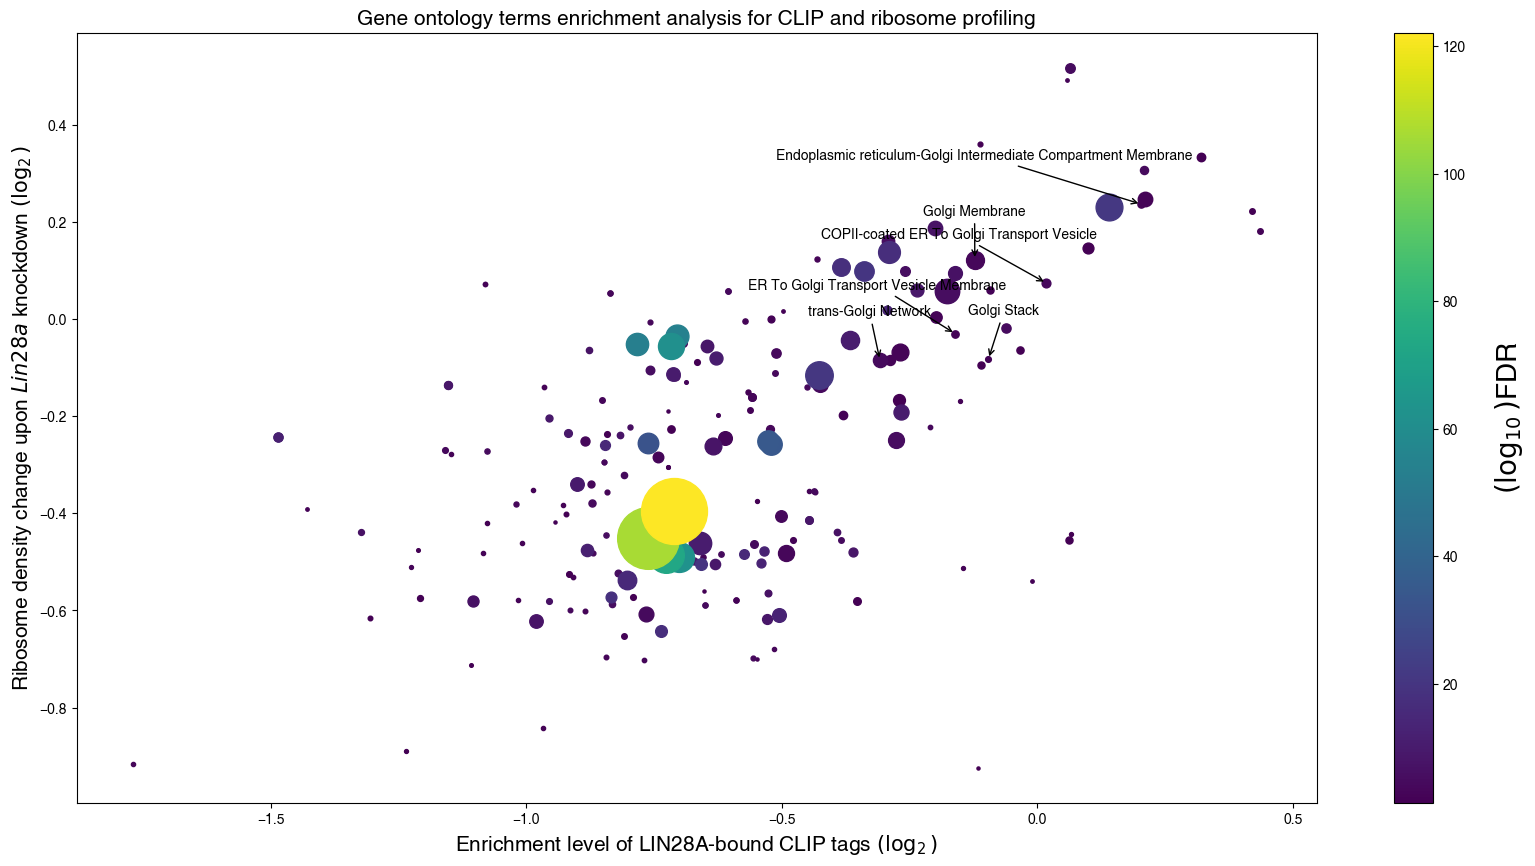

In [219]:
plt.figure(figsize=(20, 10))

cmap = get_cmap('viridis')
norm = Normalize(vmin=term_stats_sorted_nonrank['-log10(q_value)'].min(), vmax=term_stats_sorted_nonrank['-log10(q_value)'].max())

for i, row in term_stats_sorted_nonrank.iterrows():
    plt.scatter(
        row['avg_enrichment'],
        row['avg_change'],
        s=row['gene_count'] * 1,
        color=cmap(norm(row['-log10(q_value)'])),
        alpha=1,
        zorder=row['-log10(q_value)']
    )

for i, row in term_stats_sorted_nonrank.iterrows():
    for j in range(len(term_list)):
            if term_list[j] in (term_stats_sorted_nonrank['name'][i]):
                plt.annotate(row['name'],
                     xy = [row['avg_enrichment'],row['avg_change']],
                     xytext=(row['avg_enrichment'] + 0.1, row['avg_change'] + 0.1),
                     fontsize=10, 
                     ha='right', 
                     va='center', 
                     arrowprops=dict(facecolor='black', arrowstyle='->'),
                     zorder=1000)

plt.xlabel(r'Enrichment level of LIN28A-bound CLIP tags $(\log_2)$', fontdict={'fontsize': 15})
plt.ylabel(r'Ribosome density change upon $Lin28a$ knockdown $(\log_2)$', fontdict={'fontsize': 15})
plt.title('Gene ontology terms enrichment analysis for CLIP and ribosome profiling', fontdict={'fontsize': 15})

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label(r'$(\log_{10})$''FDR', labelpad=20, fontsize=20)

plt.show()

Preranked GO term analysis with Gseapy

In [220]:
pre_res_clip = gp.prerank(preranked_clip, 
                          gene_sets=['GO_Biological_Process_2023','GO_Cellular_Component_2023', 'GO_Molecular_Function_2023'],
                          permutation_num=10000, threads=64,
                          organism='Mouse',
                          outdir=None,
                          ascending=False,
                          min_size=15,
                          max_size=500,
                          format='png', seed=42, verbose=True,
                     )
pre_res_clip.res2d.head(10)

2024-06-13 01:10:23,260 [WARNING] Duplicated values found in preranked stats: 1.72% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-06-13 01:10:23,260 [INFO] Parsing data files for GSEA.............................
2024-06-13 01:10:23,262 [INFO] Enrichr library gene sets already downloaded in: /rna/junyoung/.cache/gseapy, use local file
2024-06-13 01:10:23,304 [INFO] Enrichr library gene sets already downloaded in: /rna/junyoung/.cache/gseapy, use local file
2024-06-13 01:10:23,318 [INFO] Enrichr library gene sets already downloaded in: /rna/junyoung/.cache/gseapy, use local file
2024-06-13 01:10:23,374 [INFO] 5468 gene_sets have been filtered out when max_size=500 and min_size=15
2024-06-13 01:10:23,375 [INFO] 1560 gene_sets used for further statistical testing.....
2024-06-13 01:10:23,375 [INFO] Start to run GSEA...Might take a while..................
2024-06-13 01:10:51,736 [INFO] Congratulations. GSEApy runs successfully..............

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,GO_Cellular_Component_2023__Endoplasmic Reticu...,0.545391,3.058064,0.0,0.0,0.0,51/95,16.95%,CANX;KTN1;DNAJB11;ADAM10;HSP90B1;DNAJC3;MIA3;M...
1,prerank,GO_Biological_Process_2023__Cell-Cell Adhesion...,0.659374,2.940221,0.0,0.0,0.0,19/34,14.83%,NECTIN3;ITGB1;CD164;EMB;GPC4;ATP2C1;TENM3;CDH1...
2,prerank,GO_Molecular_Function_2023__Transition Metal I...,0.769275,2.919361,0.0,0.0,0.0,14/19,13.26%,SLC30A1;SLC39A10;TTYH1;SLC39A1;TMEM165;SLC39A9...
3,prerank,GO_Biological_Process_2023__Calcium Ion Transp...,0.674813,2.702528,0.0,0.000237,0.0004,14/22,15.11%,STIM2;ITGAV;TRPM7;ATP2C1;TMEM165;ATP2B4;ATP2A2...
4,prerank,GO_Biological_Process_2023__Homophilic Cell Ad...,0.680909,2.679171,0.0,0.000237,0.0005,13/21,17.28%,NECTIN3;ITGB1;EMB;TENM3;CDH1;CADM1;PECAM1;NPTN...
5,prerank,GO_Biological_Process_2023__Vascular Transport...,0.608187,2.641421,0.0,0.000304,0.0009,17/30,15.06%,SLC12A2;INSR;SLC7A1;SLC38A2;LRP2;ABCC4;ABCG2;S...
6,prerank,GO_Biological_Process_2023__Transport Across B...,0.608187,2.641421,0.0,0.000304,0.0009,17/30,15.06%,SLC12A2;INSR;SLC7A1;SLC38A2;LRP2;ABCC4;ABCG2;S...
7,prerank,GO_Biological_Process_2023__Nitrogen Compound ...,0.505947,2.606295,0.0,0.000325,0.001,29/60,15.33%,HSP90B1;MIA3;SLC12A2;SLC26A2;SLC7A1;TMEM30A;SC...
8,prerank,GO_Biological_Process_2023__Carboxylic Acid Tr...,0.697012,2.570539,0.0,0.000368,0.0013,12/17,15.48%,SLC7A1;SLC38A2;SLC16A1;SLC38A1;SLC1A4;SLC38A4;...
9,prerank,GO_Biological_Process_2023__Membrane Lipid Bio...,0.6212,2.523024,0.0,0.000568,0.0022,15/24,17.63%,KDSR;SPTLC2;SPTLC1;SAMD8;SGPL1;DEGS1;HACD3;ELO...


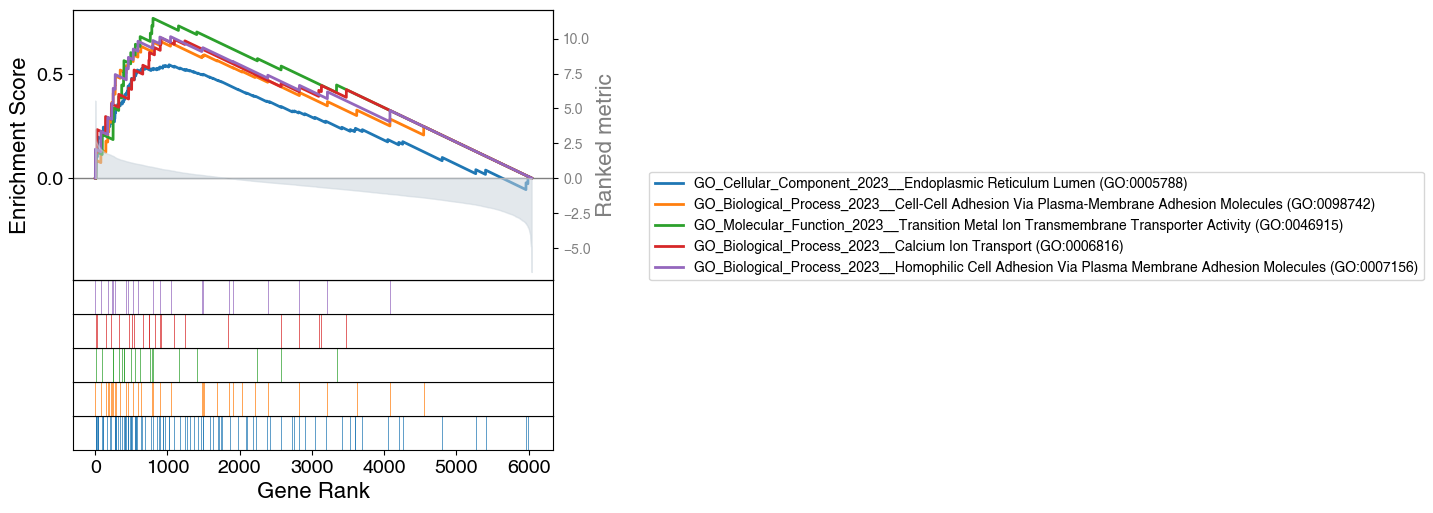

In [221]:
top5_upregulated_clip = pre_res_clip.res2d.sort_values(by='NES', ascending=False)['Term'].iloc[:5]
axs = pre_res_clip.plot(terms=top5_upregulated_clip,
                   legend_kws={'loc': (1.2, 0)},
                   show_ranking=True,
                   figsize=(3,4)
                  )

In [222]:
term_table_expanded_clip = pre_res_clip.res2d.set_index('Term')['Lead_genes'].str.split(';', expand=True).stack().reset_index(name='external_gene_name')
term_table_expanded_clip

,Term,level_1,external_gene_name
0,GO_Cellular_Component_2023__Endoplasmic Reticu...,0,CANX
1,GO_Cellular_Component_2023__Endoplasmic Reticu...,1,KTN1
2,GO_Cellular_Component_2023__Endoplasmic Reticu...,2,DNAJB11
3,GO_Cellular_Component_2023__Endoplasmic Reticu...,3,ADAM10
4,GO_Cellular_Component_2023__Endoplasmic Reticu...,4,HSP90B1
...,...,...,...
26153,GO_Molecular_Function_2023__GDP Binding (GO:00...,7,RAB8A
26154,GO_Molecular_Function_2023__GDP Binding (GO:00...,8,RRAS2
26155,GO_Molecular_Function_2023__GDP Binding (GO:00...,9,TRIM23
26156,GO_Molecular_Function_2023__GDP Binding (GO:00...,10,DYNC1LI1


In [223]:
term_table_expanded_clip_merged = pd.merge(term_table_expanded_clip, pre_res_clip.res2d, on='Term', how='inner')
term_table_expanded_clip_merged

,Term,level_1,external_gene_name,Name,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,GO_Cellular_Component_2023__Endoplasmic Reticu...,0,CANX,prerank,0.545391,3.058064,0.0,0.0,0.0,51/95,16.95%,CANX;KTN1;DNAJB11;ADAM10;HSP90B1;DNAJC3;MIA3;M...
1,GO_Cellular_Component_2023__Endoplasmic Reticu...,1,KTN1,prerank,0.545391,3.058064,0.0,0.0,0.0,51/95,16.95%,CANX;KTN1;DNAJB11;ADAM10;HSP90B1;DNAJC3;MIA3;M...
2,GO_Cellular_Component_2023__Endoplasmic Reticu...,2,DNAJB11,prerank,0.545391,3.058064,0.0,0.0,0.0,51/95,16.95%,CANX;KTN1;DNAJB11;ADAM10;HSP90B1;DNAJC3;MIA3;M...
3,GO_Cellular_Component_2023__Endoplasmic Reticu...,3,ADAM10,prerank,0.545391,3.058064,0.0,0.0,0.0,51/95,16.95%,CANX;KTN1;DNAJB11;ADAM10;HSP90B1;DNAJC3;MIA3;M...
4,GO_Cellular_Component_2023__Endoplasmic Reticu...,4,HSP90B1,prerank,0.545391,3.058064,0.0,0.0,0.0,51/95,16.95%,CANX;KTN1;DNAJB11;ADAM10;HSP90B1;DNAJC3;MIA3;M...
...,...,...,...,...,...,...,...,...,...,...,...,...
26153,GO_Molecular_Function_2023__GDP Binding (GO:00...,7,RAB8A,prerank,-0.135778,-0.407884,0.998106,0.999807,1.0,11/28,44.67%,RAB5C;ERAS;HRAS;MIEF1;RAB4A;RHEBL1;RRAGC;RAB8A...
26154,GO_Molecular_Function_2023__GDP Binding (GO:00...,8,RRAS2,prerank,-0.135778,-0.407884,0.998106,0.999807,1.0,11/28,44.67%,RAB5C;ERAS;HRAS;MIEF1;RAB4A;RHEBL1;RRAGC;RAB8A...
26155,GO_Molecular_Function_2023__GDP Binding (GO:00...,9,TRIM23,prerank,-0.135778,-0.407884,0.998106,0.999807,1.0,11/28,44.67%,RAB5C;ERAS;HRAS;MIEF1;RAB4A;RHEBL1;RRAGC;RAB8A...
26156,GO_Molecular_Function_2023__GDP Binding (GO:00...,10,DYNC1LI1,prerank,-0.135778,-0.407884,0.998106,0.999807,1.0,11/28,44.67%,RAB5C;ERAS;HRAS;MIEF1;RAB4A;RHEBL1;RRAGC;RAB8A...


Ribosome density GO term analysis

In [224]:
pre_res_rdc = gp.prerank(preranked_rdc, 
                          gene_sets=['GO_Biological_Process_2023','GO_Cellular_Component_2023', 'GO_Molecular_Function_2023'],
                          permutation_num=10000, threads=64,
                          organism='Mouse',
                          outdir=None,
                          ascending=False,
                          min_size=15,
                          max_size=500,
                          format='png', seed=42, verbose=True,
                     )
pre_res_rdc.res2d.head(10)

2024-06-13 01:10:52,344 [INFO] Parsing data files for GSEA.............................
2024-06-13 01:10:52,345 [INFO] Enrichr library gene sets already downloaded in: /rna/junyoung/.cache/gseapy, use local file
2024-06-13 01:10:52,385 [INFO] Enrichr library gene sets already downloaded in: /rna/junyoung/.cache/gseapy, use local file
2024-06-13 01:10:52,391 [INFO] Enrichr library gene sets already downloaded in: /rna/junyoung/.cache/gseapy, use local file
2024-06-13 01:10:52,439 [INFO] 5468 gene_sets have been filtered out when max_size=500 and min_size=15
2024-06-13 01:10:52,440 [INFO] 1560 gene_sets used for further statistical testing.....
2024-06-13 01:10:52,441 [INFO] Start to run GSEA...Might take a while..................
2024-06-13 01:11:19,874 [INFO] Congratulations. GSEApy runs successfully................



,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,GO_Cellular_Component_2023__Endoplasmic Reticu...,0.699896,4.031169,0.0,0.0,0.0,76/95,22.74%,ERLEC1;STC2;COL9A2;MBTPS1;COL4A1;ADAM10;FUCA2;...
1,prerank,GO_Cellular_Component_2023__Lysosomal Lumen (G...,0.719794,3.507215,0.0,0.0,0.0,38/47,17.13%,LAMP2;NAAA;IFI30;GALC;ASAH1;PPT1;CTSL;VCAN;FUC...
2,prerank,GO_Cellular_Component_2023__Endoplasmic Reticu...,0.508708,3.441437,0.0,0.0,0.0,220/372,21.65%,TMX1;NCEH1;ALG5;TMX3;ALG6;LMBRD1;HERPUD1;LPGAT...
3,prerank,GO_Molecular_Function_2023__Hexosyltransferase...,0.742184,3.357888,0.0,0.0,0.0,29/34,18.31%,ALG5;DPY19L4;ALG6;GCNT2;B3GNT7;TMTC3;PIGM;LARG...
4,prerank,GO_Biological_Process_2023__Transport Across B...,0.771597,3.357417,0.0,0.0,0.0,26/30,18.02%,SLC1A4;ATP2B4;SLC7A1;SLC1A5;SLC7A5;SLC12A2;SLC...
5,prerank,GO_Biological_Process_2023__Vascular Transport...,0.771597,3.357417,0.0,0.0,0.0,26/30,18.02%,SLC1A4;ATP2B4;SLC7A1;SLC1A5;SLC7A5;SLC12A2;SLC...
6,prerank,GO_Biological_Process_2023__Cell-Cell Adhesion...,0.726562,3.275075,0.0,0.0,0.0,26/34,17.38%,CD164;EMB;NECTIN3;ITGB1;CLDN4;ICAM1;DSG2;CEACA...
7,prerank,GO_Biological_Process_2023__Nitrogen Compound ...,0.608455,3.143282,0.0,0.0,0.0,37/60,14.35%,LRRC8D;SLC43A2;SCAMP1;SLC1A4;PPT1;ATP11B;SLC3A...
8,prerank,GO_Biological_Process_2023__Carboxylic Acid Tr...,0.833187,3.067494,0.0,0.0,0.0,16/17,14.07%,SLC43A2;SLC1A4;SLC3A2;SLC7A1;SLC1A5;SLC7A5;SLC...
9,prerank,GO_Molecular_Function_2023__Carboxylic Acid Tr...,0.743057,3.064769,0.0,0.0,0.0,19/25,14.07%,SLC43A2;SLC1A4;SLC7A1;SLC1A5;SLC7A5;SLC38A9;SL...


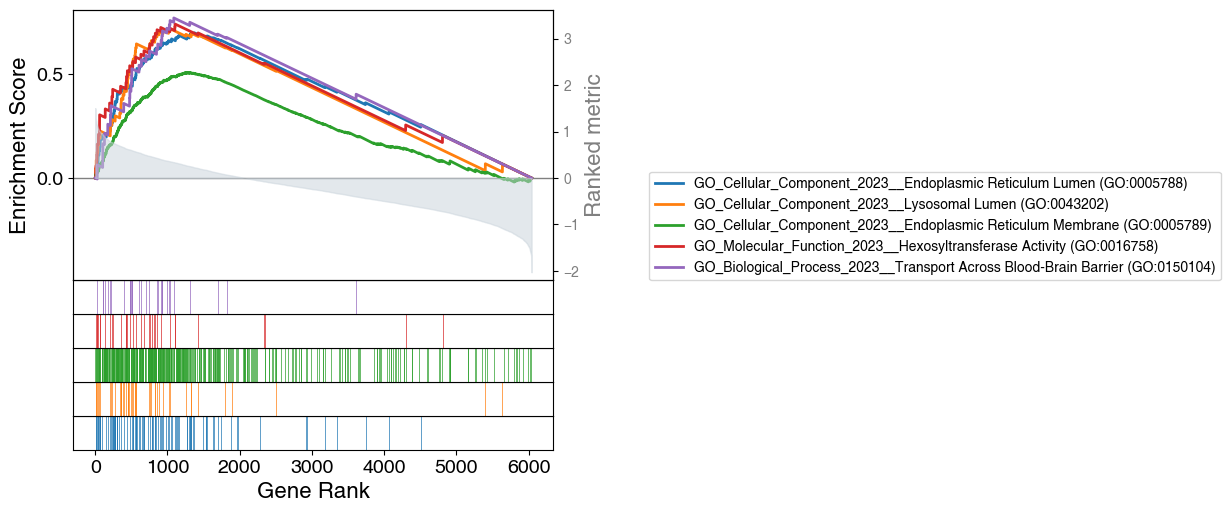

In [225]:
top5_upregulated_rdc = pre_res_rdc.res2d.sort_values(by='NES', ascending=False)['Term'].iloc[:5]
axs = pre_res_rdc.plot(terms=top5_upregulated_rdc,
                   legend_kws={'loc': (1.2, 0)},
                   show_ranking=True,
                   figsize=(3,4)
                  )

In [226]:
term_table_expanded_rdc = pre_res_rdc.res2d.set_index('Term')['Lead_genes'].str.split(';', expand=True).stack().reset_index(name='external_gene_name')
term_table_expanded_rdc

,Term,level_1,external_gene_name
0,GO_Cellular_Component_2023__Endoplasmic Reticu...,0,ERLEC1
1,GO_Cellular_Component_2023__Endoplasmic Reticu...,1,STC2
2,GO_Cellular_Component_2023__Endoplasmic Reticu...,2,COL9A2
3,GO_Cellular_Component_2023__Endoplasmic Reticu...,3,MBTPS1
4,GO_Cellular_Component_2023__Endoplasmic Reticu...,4,COL4A1
...,...,...,...
31714,GO_Biological_Process_2023__Positive Regulatio...,4,DYNC1H1
31715,GO_Biological_Process_2023__Positive Regulatio...,5,CHP1
31716,GO_Biological_Process_2023__Positive Regulatio...,6,GSK3A
31717,GO_Biological_Process_2023__Positive Regulatio...,7,C2CD5


In [227]:
term_table_expanded_rdc_merged = pd.merge(term_table_expanded_rdc, pre_res_rdc.res2d, on='Term', how='inner')
term_table_expanded_rdc_merged

,Term,level_1,external_gene_name,Name,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,GO_Cellular_Component_2023__Endoplasmic Reticu...,0,ERLEC1,prerank,0.699896,4.031169,0.0,0.0,0.0,76/95,22.74%,ERLEC1;STC2;COL9A2;MBTPS1;COL4A1;ADAM10;FUCA2;...
1,GO_Cellular_Component_2023__Endoplasmic Reticu...,1,STC2,prerank,0.699896,4.031169,0.0,0.0,0.0,76/95,22.74%,ERLEC1;STC2;COL9A2;MBTPS1;COL4A1;ADAM10;FUCA2;...
2,GO_Cellular_Component_2023__Endoplasmic Reticu...,2,COL9A2,prerank,0.699896,4.031169,0.0,0.0,0.0,76/95,22.74%,ERLEC1;STC2;COL9A2;MBTPS1;COL4A1;ADAM10;FUCA2;...
3,GO_Cellular_Component_2023__Endoplasmic Reticu...,3,MBTPS1,prerank,0.699896,4.031169,0.0,0.0,0.0,76/95,22.74%,ERLEC1;STC2;COL9A2;MBTPS1;COL4A1;ADAM10;FUCA2;...
4,GO_Cellular_Component_2023__Endoplasmic Reticu...,4,COL4A1,prerank,0.699896,4.031169,0.0,0.0,0.0,76/95,22.74%,ERLEC1;STC2;COL9A2;MBTPS1;COL4A1;ADAM10;FUCA2;...
...,...,...,...,...,...,...,...,...,...,...,...,...
31714,GO_Biological_Process_2023__Positive Regulatio...,4,DYNC1H1,prerank,-0.122781,-0.352004,0.999755,1.0,1.0,8/18,48.20%,ACTB;SPAG5;PLAA;ANXA2;DYNC1H1;CHP1;GSK3A;C2CD5
31715,GO_Biological_Process_2023__Positive Regulatio...,5,CHP1,prerank,-0.122781,-0.352004,0.999755,1.0,1.0,8/18,48.20%,ACTB;SPAG5;PLAA;ANXA2;DYNC1H1;CHP1;GSK3A;C2CD5
31716,GO_Biological_Process_2023__Positive Regulatio...,6,GSK3A,prerank,-0.122781,-0.352004,0.999755,1.0,1.0,8/18,48.20%,ACTB;SPAG5;PLAA;ANXA2;DYNC1H1;CHP1;GSK3A;C2CD5
31717,GO_Biological_Process_2023__Positive Regulatio...,7,C2CD5,prerank,-0.122781,-0.352004,0.999755,1.0,1.0,8/18,48.20%,ACTB;SPAG5;PLAA;ANXA2;DYNC1H1;CHP1;GSK3A;C2CD5


In [228]:
term_table_expanded_merged = pd.merge(term_table_expanded_clip_merged, term_table_expanded_rdc_merged, on=['Term','external_gene_name'], how='inner')
term_table_expanded_merged

,Term,level_1_x,external_gene_name,Name_x,ES_x,NES_x,NOM p-val_x,FDR q-val_x,FWER p-val_x,Tag %_x,...,level_1_y,Name_y,ES_y,NES_y,NOM p-val_y,FDR q-val_y,FWER p-val_y,Tag %_y,Gene %_y,Lead_genes_y
0,GO_Cellular_Component_2023__Endoplasmic Reticu...,0,CANX,prerank,0.545391,3.058064,0.0,0.0,0.0,51/95,...,30,prerank,0.699896,4.031169,0.0,0.0,0.0,76/95,22.74%,ERLEC1;STC2;COL9A2;MBTPS1;COL4A1;ADAM10;FUCA2;...
1,GO_Cellular_Component_2023__Endoplasmic Reticu...,1,KTN1,prerank,0.545391,3.058064,0.0,0.0,0.0,51/95,...,51,prerank,0.699896,4.031169,0.0,0.0,0.0,76/95,22.74%,ERLEC1;STC2;COL9A2;MBTPS1;COL4A1;ADAM10;FUCA2;...
2,GO_Cellular_Component_2023__Endoplasmic Reticu...,2,DNAJB11,prerank,0.545391,3.058064,0.0,0.0,0.0,51/95,...,16,prerank,0.699896,4.031169,0.0,0.0,0.0,76/95,22.74%,ERLEC1;STC2;COL9A2;MBTPS1;COL4A1;ADAM10;FUCA2;...
3,GO_Cellular_Component_2023__Endoplasmic Reticu...,3,ADAM10,prerank,0.545391,3.058064,0.0,0.0,0.0,51/95,...,5,prerank,0.699896,4.031169,0.0,0.0,0.0,76/95,22.74%,ERLEC1;STC2;COL9A2;MBTPS1;COL4A1;ADAM10;FUCA2;...
4,GO_Cellular_Component_2023__Endoplasmic Reticu...,4,HSP90B1,prerank,0.545391,3.058064,0.0,0.0,0.0,51/95,...,12,prerank,0.699896,4.031169,0.0,0.0,0.0,76/95,22.74%,ERLEC1;STC2;COL9A2;MBTPS1;COL4A1;ADAM10;FUCA2;...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16023,GO_Molecular_Function_2023__GDP Binding (GO:00...,7,RAB8A,prerank,-0.135778,-0.407884,0.998106,0.999807,1.0,11/28,...,7,prerank,-0.149651,-0.469196,0.994344,1.0,1.0,28/28,85.12%,ERAS;DYNC1LI1;RAB5C;MIEF1;RAB5A;RAB4A;TRIM23;R...
16024,GO_Molecular_Function_2023__GDP Binding (GO:00...,8,RRAS2,prerank,-0.135778,-0.407884,0.998106,0.999807,1.0,11/28,...,16,prerank,-0.149651,-0.469196,0.994344,1.0,1.0,28/28,85.12%,ERAS;DYNC1LI1;RAB5C;MIEF1;RAB5A;RAB4A;TRIM23;R...
16025,GO_Molecular_Function_2023__GDP Binding (GO:00...,9,TRIM23,prerank,-0.135778,-0.407884,0.998106,0.999807,1.0,11/28,...,6,prerank,-0.149651,-0.469196,0.994344,1.0,1.0,28/28,85.12%,ERAS;DYNC1LI1;RAB5C;MIEF1;RAB5A;RAB4A;TRIM23;R...
16026,GO_Molecular_Function_2023__GDP Binding (GO:00...,10,DYNC1LI1,prerank,-0.135778,-0.407884,0.998106,0.999807,1.0,11/28,...,1,prerank,-0.149651,-0.469196,0.994344,1.0,1.0,28/28,85.12%,ERAS;DYNC1LI1;RAB5C;MIEF1;RAB5A;RAB4A;TRIM23;R...


In [229]:
merged_table = pd.merge(term_table_expanded_merged, total_results, on='external_gene_name')
merged_table['log2FC_clip_enrichment'] = np.log2(merged_table['clip_enrichment'])
merged_table['log2FC_rden_change'] = np.log2(merged_table['rden_change'])
merged_table

,Term,level_1_x,external_gene_name,Name_x,ES_x,NES_x,NOM p-val_x,FDR q-val_x,FWER p-val_x,Tag %_x,...,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,log2FC_clip_enrichment,log2FC_rden_change
0,GO_Cellular_Component_2023__Endoplasmic Reticu...,0,CANX,prerank,0.545391,3.058064,0.0,0.0,0.0,51/95,...,0.000000,672.454481,822.347740,940.844580,2958.285215,2244.880739,6.620280,1.507680,2.726892,0.592330
1,GO_Biological_Process_2023__ERAD Pathway (GO:0...,0,CANX,prerank,0.42111,2.191164,0.0,0.003951,0.0422,26/61,...,0.000000,672.454481,822.347740,940.844580,2958.285215,2244.880739,6.620280,1.507680,2.726892,0.592330
2,GO_Molecular_Function_2023__Calcium Ion Bindin...,1,CANX,prerank,0.389236,2.148713,0.0,0.005423,0.0606,31/82,...,0.000000,672.454481,822.347740,940.844580,2958.285215,2244.880739,6.620280,1.507680,2.726892,0.592330
3,GO_Biological_Process_2023__Ubiquitin-Dependen...,0,CANX,prerank,0.382383,1.912728,0.0,0.020395,0.3106,21/52,...,0.000000,672.454481,822.347740,940.844580,2958.285215,2244.880739,6.620280,1.507680,2.726892,0.592330
4,GO_Biological_Process_2023__Protein Secretion ...,0,CANX,prerank,0.42923,1.645795,0.022535,0.058755,0.8461,8/20,...,0.000000,672.454481,822.347740,940.844580,2958.285215,2244.880739,6.620280,1.507680,2.726892,0.592330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16023,GO_Molecular_Function_2023__GDP Binding (GO:00...,6,RRAGC,prerank,-0.135778,-0.407884,0.998106,0.999807,1.0,11/28,...,16.527101,58.146094,75.029615,71.824992,10.873926,11.860829,0.541928,0.877636,-0.883827,-0.188306
16024,GO_Molecular_Function_2023__GDP Binding (GO:00...,7,RAB8A,prerank,-0.135778,-0.407884,0.998106,0.999807,1.0,11/28,...,50.357745,52.433496,69.983522,71.196786,30.985877,36.378515,0.554742,0.866530,-0.850111,-0.206679
16025,GO_Molecular_Function_2023__GDP Binding (GO:00...,8,RRAS2,prerank,-0.135778,-0.407884,0.998106,0.999807,1.0,11/28,...,0.110920,40.396234,32.840967,43.346278,15.589168,20.935557,0.566285,0.982821,-0.820400,-0.025000
16026,GO_Molecular_Function_2023__GDP Binding (GO:00...,9,TRIM23,prerank,-0.135778,-0.407884,0.998106,0.999807,1.0,11/28,...,33.830644,53.657624,39.458794,61.354877,12.990973,24.438083,0.570320,0.826570,-0.810156,-0.274790


In [230]:
term_stats = merged_table.groupby(['Term']).agg(
    p_value_clip = ('FDR q-val_x', 'first'),
    p_value_rdc = ('FDR q-val_y', 'first'),
    avg_enrichment=('log2FC_clip_enrichment', 'mean'),
    avg_change=('log2FC_rden_change', 'mean'),
    gene_count=('external_gene_name', 'count')
).reset_index()
term_stats['p_value_max'] = term_stats[['p_value_clip', 'p_value_rdc']].max(axis=1)
term_stats['-log10(p_value_max)'] = -np.log10(term_stats['p_value_max'].astype(float)+1e-38)
term_stats_sorted = term_stats.loc[term_stats['p_value_max'] < 0.05]
term_stats_sorted

,Term,p_value_clip,p_value_rdc,avg_enrichment,avg_change,gene_count,p_value_max,-log10(p_value_max)
13,GO_Biological_Process_2023__Amino Acid Transme...,0.046542,0.000622,1.372838,0.692057,6,0.046542,1.332159
14,GO_Biological_Process_2023__Amino Acid Transpo...,0.003984,0.0,1.148804,0.792342,10,0.003984,2.399657
22,GO_Biological_Process_2023__Artery Morphogenes...,0.011267,0.004149,1.658280,0.610818,6,0.011267,1.948177
40,GO_Biological_Process_2023__Calcium Ion Homeos...,0.001407,0.002531,1.738859,0.827631,9,0.002531,2.596652
41,GO_Biological_Process_2023__Calcium Ion Transm...,0.00065,0.00076,1.703515,0.676307,7,0.00076,3.119444
...,...,...,...,...,...,...,...,...
1272,GO_Molecular_Function_2023__Carboxylic Acid Tr...,0.020045,0.0,1.133157,0.696101,13,0.020045,1.697990
1310,GO_Molecular_Function_2023__Hexosyltransferase...,0.003044,0.0,1.460893,0.764623,11,0.003044,2.516594
1339,GO_Molecular_Function_2023__Neutral L-amino Ac...,0.047028,0.000005,0.914230,0.766775,10,0.047028,1.327643
1419,GO_Molecular_Function_2023__Transition Metal I...,0.0,0.0,1.339412,0.668714,12,0.0,38.000000


In [231]:
term_stats_sorted['Term'].iloc[1]

'GO_Biological_Process_2023__Amino Acid Transport (GO:0006865)'

In [232]:
def split_and_replace(term):
    parts = term.split('__')
    category = parts[0]
    process_and_id = parts[1]
    
    process = process_and_id.rsplit(' (', 1)[0]
    go_id = process_and_id.rsplit(' (', 1)[1].rstrip(')')
    
    if category == 'GO_Biological_Process_2023':
        category = 'GO:BP'
    if category == 'GO_Cellular_Component_2023':
        category = 'GO:CC'
    if category == 'GO_Molecular_Function_2023':
        category = 'GO:MF'
    
    return category, process, go_id

term_stats_sorted[['source', 'name', 'native']] = term_stats_sorted['Term'].apply(split_and_replace).apply(pd.Series).copy()
term_stats_sorted

/tmp/ipykernel_4145512/2629896303.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  term_stats_sorted[['source', 'name', 'native']] = term_stats_sorted['Term'].apply(split_and_replace).apply(pd.Series).copy()
/tmp/ipykernel_4145512/2629896303.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  term_stats_sorted[['source', 'name', 'native']] = term_stats_sorted['Term'].apply(split_and_replace).apply(pd.Series).copy()
/tmp/ipykernel_4145512/2629896303.py:18: SettingWithCopyWarning: 
A value is trying to b

,Term,p_value_clip,p_value_rdc,avg_enrichment,avg_change,gene_count,p_value_max,-log10(p_value_max),source,name,native
13,GO_Biological_Process_2023__Amino Acid Transme...,0.046542,0.000622,1.372838,0.692057,6,0.046542,1.332159,GO:BP,Amino Acid Transmembrane Transport,GO:0003333
14,GO_Biological_Process_2023__Amino Acid Transpo...,0.003984,0.0,1.148804,0.792342,10,0.003984,2.399657,GO:BP,Amino Acid Transport,GO:0006865
22,GO_Biological_Process_2023__Artery Morphogenes...,0.011267,0.004149,1.658280,0.610818,6,0.011267,1.948177,GO:BP,Artery Morphogenesis,GO:0048844
40,GO_Biological_Process_2023__Calcium Ion Homeos...,0.001407,0.002531,1.738859,0.827631,9,0.002531,2.596652,GO:BP,Calcium Ion Homeostasis,GO:0055074
41,GO_Biological_Process_2023__Calcium Ion Transm...,0.00065,0.00076,1.703515,0.676307,7,0.00076,3.119444,GO:BP,Calcium Ion Transmembrane Transport,GO:0070588
...,...,...,...,...,...,...,...,...,...,...,...
1272,GO_Molecular_Function_2023__Carboxylic Acid Tr...,0.020045,0.0,1.133157,0.696101,13,0.020045,1.697990,GO:MF,Carboxylic Acid Transmembrane Transporter Acti...,GO:0046943
1310,GO_Molecular_Function_2023__Hexosyltransferase...,0.003044,0.0,1.460893,0.764623,11,0.003044,2.516594,GO:MF,Hexosyltransferase Activity,GO:0016758
1339,GO_Molecular_Function_2023__Neutral L-amino Ac...,0.047028,0.000005,0.914230,0.766775,10,0.047028,1.327643,GO:MF,Neutral L-amino Acid Transmembrane Transporter...,GO:0015175
1419,GO_Molecular_Function_2023__Transition Metal I...,0.0,0.0,1.339412,0.668714,12,0.0,38.000000,GO:MF,Transition Metal Ion Transmembrane Transporter...,GO:0046915


In [233]:
term_stats_sorted

,Term,p_value_clip,p_value_rdc,avg_enrichment,avg_change,gene_count,p_value_max,-log10(p_value_max),source,name,native
13,GO_Biological_Process_2023__Amino Acid Transme...,0.046542,0.000622,1.372838,0.692057,6,0.046542,1.332159,GO:BP,Amino Acid Transmembrane Transport,GO:0003333
14,GO_Biological_Process_2023__Amino Acid Transpo...,0.003984,0.0,1.148804,0.792342,10,0.003984,2.399657,GO:BP,Amino Acid Transport,GO:0006865
22,GO_Biological_Process_2023__Artery Morphogenes...,0.011267,0.004149,1.658280,0.610818,6,0.011267,1.948177,GO:BP,Artery Morphogenesis,GO:0048844
40,GO_Biological_Process_2023__Calcium Ion Homeos...,0.001407,0.002531,1.738859,0.827631,9,0.002531,2.596652,GO:BP,Calcium Ion Homeostasis,GO:0055074
41,GO_Biological_Process_2023__Calcium Ion Transm...,0.00065,0.00076,1.703515,0.676307,7,0.00076,3.119444,GO:BP,Calcium Ion Transmembrane Transport,GO:0070588
...,...,...,...,...,...,...,...,...,...,...,...
1272,GO_Molecular_Function_2023__Carboxylic Acid Tr...,0.020045,0.0,1.133157,0.696101,13,0.020045,1.697990,GO:MF,Carboxylic Acid Transmembrane Transporter Acti...,GO:0046943
1310,GO_Molecular_Function_2023__Hexosyltransferase...,0.003044,0.0,1.460893,0.764623,11,0.003044,2.516594,GO:MF,Hexosyltransferase Activity,GO:0016758
1339,GO_Molecular_Function_2023__Neutral L-amino Ac...,0.047028,0.000005,0.914230,0.766775,10,0.047028,1.327643,GO:MF,Neutral L-amino Acid Transmembrane Transporter...,GO:0015175
1419,GO_Molecular_Function_2023__Transition Metal I...,0.0,0.0,1.339412,0.668714,12,0.0,38.000000,GO:MF,Transition Metal Ion Transmembrane Transporter...,GO:0046915


/tmp/ipykernel_4145512/2681053255.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


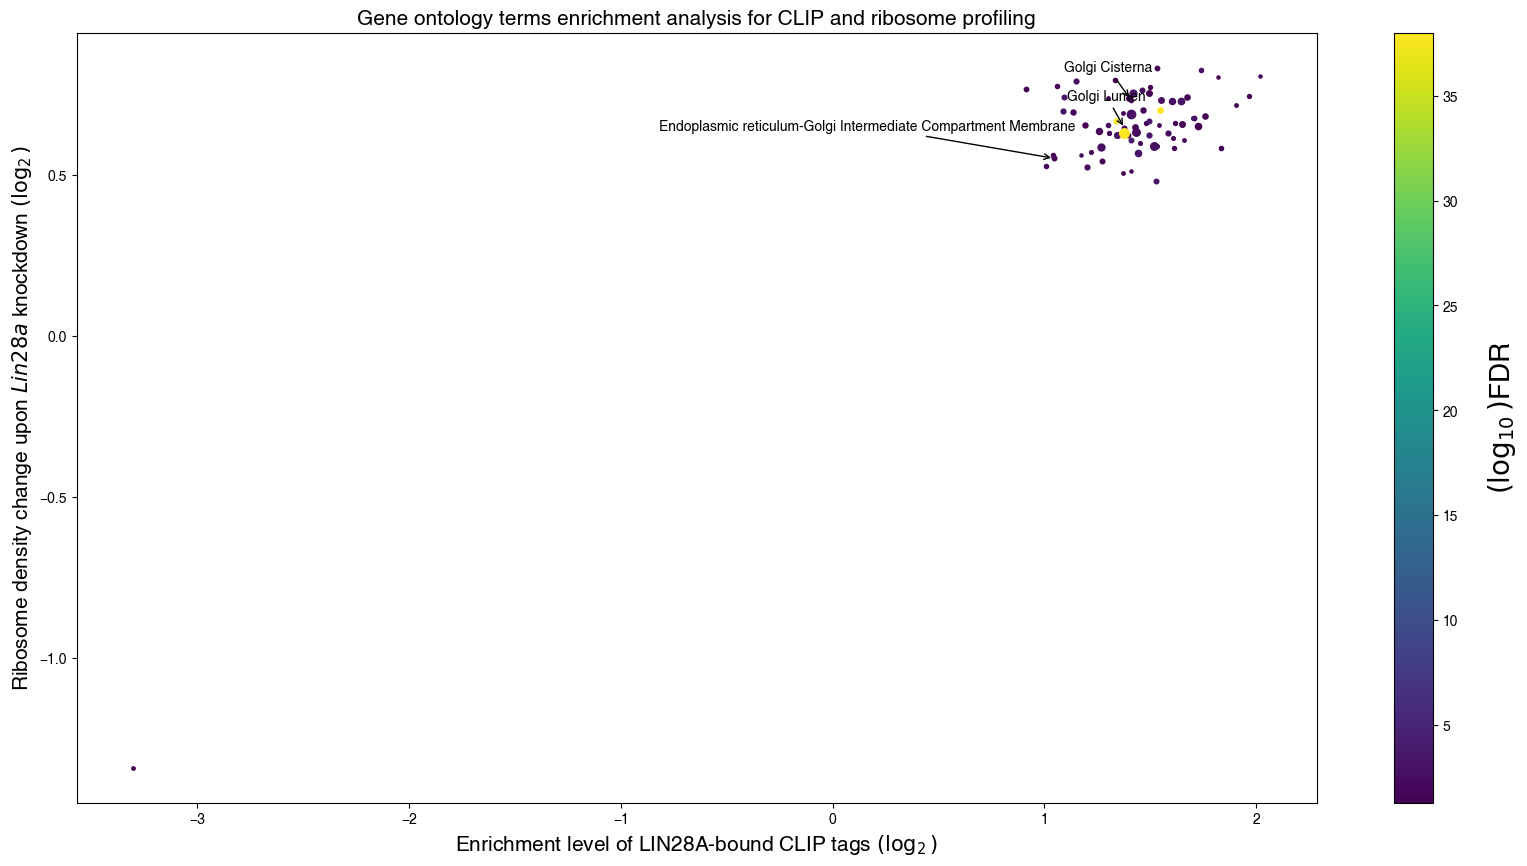

In [234]:
plt.figure(figsize=(20, 10))

cmap = get_cmap('viridis')
norm = Normalize(vmin=term_stats_sorted['-log10(p_value_max)'].min(), vmax=term_stats_sorted['-log10(p_value_max)'].max())

for i, row in term_stats_sorted.iterrows():
    plt.scatter(
        row['avg_enrichment'],
        row['avg_change'],
        s=row['gene_count'] * 1,
        color=cmap(norm(row['-log10(p_value_max)'])),
        alpha=1,
        zorder=row['-log10(p_value_max)']
    )

for i, row in term_stats_sorted.iterrows():
    for j in range(len(term_list)):
            if term_list[j] in (term_stats_sorted['name'][i]):
                plt.annotate(row['name'],
                     xy = [row['avg_enrichment'],row['avg_change']],
                     xytext=(row['avg_enrichment'] + 0.1, row['avg_change'] + 0.1),
                     fontsize=10, 
                     ha='right', 
                     va='center', 
                     arrowprops=dict(facecolor='black', arrowstyle='->'),
                     zorder=1000)

plt.xlabel(r'Enrichment level of LIN28A-bound CLIP tags $(\log_2)$', fontdict={'fontsize': 15})
plt.ylabel(r'Ribosome density change upon $Lin28a$ knockdown $(\log_2)$', fontdict={'fontsize': 15})
plt.title('Gene ontology terms enrichment analysis for CLIP and ribosome profiling', fontdict={'fontsize': 15})

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label(r'$(\log_{10})$''FDR', labelpad=20, fontsize=20)

plt.show()

G:profiler GO term analysis

In [235]:
nonrank_result = gp2.profile(organism='mmusculus',
                             query=total_genenames.tolist(),
                             sources=["GO:BP", "GO:MF", "GO:CC"],
                             no_evidences=False)
nonrank_result.head()

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
0,GO:CC,GO:0005654,nucleoplasm,4.940656e-324,True,"""That part of the nuclear content other than t...",3883,5853,1874,26995,0.320178,0.482617,query_1,"[GO:0031981, GO:0110165]","[GNAI3, CDC45, NARF, KLF6, NGFR, XPO6, TFE3, B...","[[ISO, IEA], [ISO, IBA, IEA], [ISO, IEA], [IEA..."
1,GO:CC,GO:0043226,organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",16169,5853,5079,26995,0.867760,0.314120,query_1,[GO:0110165],"[GNAI3, CDC45, NARF, KLF6, COX5A, NGFR, FER, X...","[[IDA, ISS, ISO, IEA], [ISO, IBA, NAS, IEA], [..."
2,GO:CC,GO:0043227,membrane-bounded organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",14934,5853,4822,26995,0.823851,0.322887,query_1,[GO:0043226],"[GNAI3, CDC45, NARF, KLF6, COX5A, NGFR, FER, X...","[[IDA, ISO, IEA], [ISO, IBA, NAS, IEA], [ISO, ..."
3,GO:CC,GO:0043229,intracellular organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",15836,5853,5041,26995,0.861268,0.318325,query_1,"[GO:0005622, GO:0043226]","[GNAI3, CDC45, NARF, KLF6, COX5A, NGFR, FER, X...","[[IDA, ISS, ISO, IEA], [ISO, IBA, NAS, IEA], [..."
4,GO:CC,GO:0043231,intracellular membrane-bounded organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",14435,5853,4754,26995,0.812233,0.329338,query_1,"[GO:0043227, GO:0043229]","[GNAI3, CDC45, NARF, KLF6, COX5A, NGFR, FER, X...","[[IDA, ISO, IEA], [ISO, IBA, NAS, IEA], [ISO, ..."


In [236]:
term_table_expanded_gpro_nonrank = nonrank_result.explode('intersections').reset_index(drop=True)
term_table_expanded_gpro_nonrank = term_table_expanded_gpro_nonrank.rename(columns={'intersections': 'external_gene_name'})
term_table_expanded_gpro_nonrank

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,external_gene_name,evidences
0,GO:CC,GO:0005654,nucleoplasm,4.940656e-324,True,"""That part of the nuclear content other than t...",3883,5853,1874,26995,0.320178,0.482617,query_1,"[GO:0031981, GO:0110165]",GNAI3,"[[ISO, IEA], [ISO, IBA, IEA], [ISO, IEA], [IEA..."
1,GO:CC,GO:0005654,nucleoplasm,4.940656e-324,True,"""That part of the nuclear content other than t...",3883,5853,1874,26995,0.320178,0.482617,query_1,"[GO:0031981, GO:0110165]",CDC45,"[[ISO, IEA], [ISO, IBA, IEA], [ISO, IEA], [IEA..."
2,GO:CC,GO:0005654,nucleoplasm,4.940656e-324,True,"""That part of the nuclear content other than t...",3883,5853,1874,26995,0.320178,0.482617,query_1,"[GO:0031981, GO:0110165]",NARF,"[[ISO, IEA], [ISO, IBA, IEA], [ISO, IEA], [IEA..."
3,GO:CC,GO:0005654,nucleoplasm,4.940656e-324,True,"""That part of the nuclear content other than t...",3883,5853,1874,26995,0.320178,0.482617,query_1,"[GO:0031981, GO:0110165]",KLF6,"[[ISO, IEA], [ISO, IBA, IEA], [ISO, IEA], [IEA..."
4,GO:CC,GO:0005654,nucleoplasm,4.940656e-324,True,"""That part of the nuclear content other than t...",3883,5853,1874,26995,0.320178,0.482617,query_1,"[GO:0031981, GO:0110165]",NGFR,"[[ISO, IEA], [ISO, IBA, IEA], [ISO, IEA], [IEA..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570275,GO:MF,GO:0000062,fatty-acyl-CoA binding,4.993627e-02,True,"""Binding to a fatty-acyl-CoA, any derivative o...",23,5715,14,25063,0.002450,0.608696,query_1,"[GO:0120227, GO:1901567]",HMGCL,"[[ISO, IBA, IEA], [ISO], [ISO, IBA], [IEA], [I..."
570276,GO:MF,GO:0000062,fatty-acyl-CoA binding,4.993627e-02,True,"""Binding to a fatty-acyl-CoA, any derivative o...",23,5715,14,25063,0.002450,0.608696,query_1,"[GO:0120227, GO:1901567]",ACOT7,"[[ISO, IBA, IEA], [ISO], [ISO, IBA], [IEA], [I..."
570277,GO:MF,GO:0000062,fatty-acyl-CoA binding,4.993627e-02,True,"""Binding to a fatty-acyl-CoA, any derivative o...",23,5715,14,25063,0.002450,0.608696,query_1,"[GO:0120227, GO:1901567]",ACADS,"[[ISO, IBA, IEA], [ISO], [ISO, IBA], [IEA], [I..."
570278,GO:MF,GO:0000062,fatty-acyl-CoA binding,4.993627e-02,True,"""Binding to a fatty-acyl-CoA, any derivative o...",23,5715,14,25063,0.002450,0.608696,query_1,"[GO:0120227, GO:1901567]",ACBD6,"[[ISO, IBA, IEA], [ISO], [ISO, IBA], [IEA], [I..."


In [237]:
merged_table_gpro_nonrank = pd.merge(term_table_expanded_gpro_nonrank, total_results, on='external_gene_name')
merged_table_gpro_nonrank['log2FC_clip_enrichment'] = np.log2(merged_table_gpro_nonrank['clip_enrichment'])
merged_table_gpro_nonrank['log2FC_rden_change'] = np.log2(merged_table_gpro_nonrank['rden_change'])
merged_table_gpro_nonrank

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,...,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,log2FC_clip_enrichment,log2FC_rden_change
0,GO:CC,GO:0005654,nucleoplasm,4.940656e-324,True,"""That part of the nuclear content other than t...",3883,5853,1874,26995,...,0.0,146.283332,123.339753,190.241999,32.814236,51.901076,1.025790,0.975190,0.036735,-0.036245
1,GO:CC,GO:0043226,organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",16169,5853,5079,26995,...,0.0,146.283332,123.339753,190.241999,32.814236,51.901076,1.025790,0.975190,0.036735,-0.036245
2,GO:CC,GO:0043227,membrane-bounded organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",14934,5853,4822,26995,...,0.0,146.283332,123.339753,190.241999,32.814236,51.901076,1.025790,0.975190,0.036735,-0.036245
3,GO:CC,GO:0043229,intracellular organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",15836,5853,5041,26995,...,0.0,146.283332,123.339753,190.241999,32.814236,51.901076,1.025790,0.975190,0.036735,-0.036245
4,GO:CC,GO:0043231,intracellular membrane-bounded organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",14435,5853,4754,26995,...,0.0,146.283332,123.339753,190.241999,32.814236,51.901076,1.025790,0.975190,0.036735,-0.036245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570275,GO:MF,GO:0030234,enzyme regulator activity,1.046933e-14,True,"""Binds to and modulates the activity of an enz...",1264,5715,416,25063,...,0.0,45.496769,48.475584,45.754405,23.576211,24.676892,0.707583,0.901765,-0.499029,-0.149176
570276,GO:MF,GO:0008047,enzyme activator activity,1.881760e-10,True,"""Binds to and increases the activity of an enz...",545,5715,198,25063,...,0.0,45.496769,48.475584,45.754405,23.576211,24.676892,0.707583,0.901765,-0.499029,-0.149176
570277,GO:MF,GO:0098772,molecular function regulator activity,5.556966e-06,True,"""A molecular function regulator regulates the ...",2074,5715,578,25063,...,0.0,45.496769,48.475584,45.754405,23.576211,24.676892,0.707583,0.901765,-0.499029,-0.149176
570278,GO:MF,GO:0060589,nucleoside-triphosphatase regulator activity,6.972773e-03,True,"""Binds to and modulates the activity of an NTP...",441,5715,139,25063,...,0.0,45.496769,48.475584,45.754405,23.576211,24.676892,0.707583,0.901765,-0.499029,-0.149176


In [238]:
term_stats_gpro_nonrank = merged_table_gpro_nonrank.groupby(['native']).agg(
    source=('source','first'),
    name=('name', 'first'),
    p_value = ('p_value', 'first'),
    avg_enrichment=('log2FC_clip_enrichment', 'mean'),
    avg_change=('log2FC_rden_change', 'mean'),
    gene_count=('external_gene_name', 'count')
).reset_index()
term_stats_gpro_nonrank['-log10(p_value)'] = -np.log10(term_stats_gpro_nonrank['p_value'])
term_stats_gpro_nonrank

,native,source,name,p_value,avg_enrichment,avg_change,gene_count,-log10(p_value)
0,GO:0000002,GO:BP,mitochondrial genome maintenance,1.969449e-03,-0.966861,-0.424680,21,2.705655
1,GO:0000003,GO:BP,reproduction,1.050961e-06,-0.452934,-0.267428,506,5.978413
2,GO:0000018,GO:BP,regulation of DNA recombination,1.425433e-10,-0.805686,-0.421701,67,9.846053
3,GO:0000027,GO:BP,ribosomal large subunit assembly,1.122728e-07,-1.174805,-0.466259,22,6.949726
4,GO:0000028,GO:BP,ribosomal small subunit assembly,2.529050e-07,-1.277342,-0.265465,18,6.597043
...,...,...,...,...,...,...,...,...
2524,GO:2001242,GO:BP,regulation of intrinsic apoptotic signaling pa...,8.280574e-19,-0.601601,-0.240753,100,18.081940
2525,GO:2001243,GO:BP,negative regulation of intrinsic apoptotic sig...,1.385866e-12,-0.473803,-0.220617,61,11.858279
2526,GO:2001244,GO:BP,positive regulation of intrinsic apoptotic sig...,2.372773e-03,-0.984140,-0.303711,33,2.624744
2527,GO:2001251,GO:BP,negative regulation of chromosome organization,5.439974e-23,-0.708932,-0.495755,67,22.264403


/tmp/ipykernel_4145512/2579027938.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('YlOrRd')


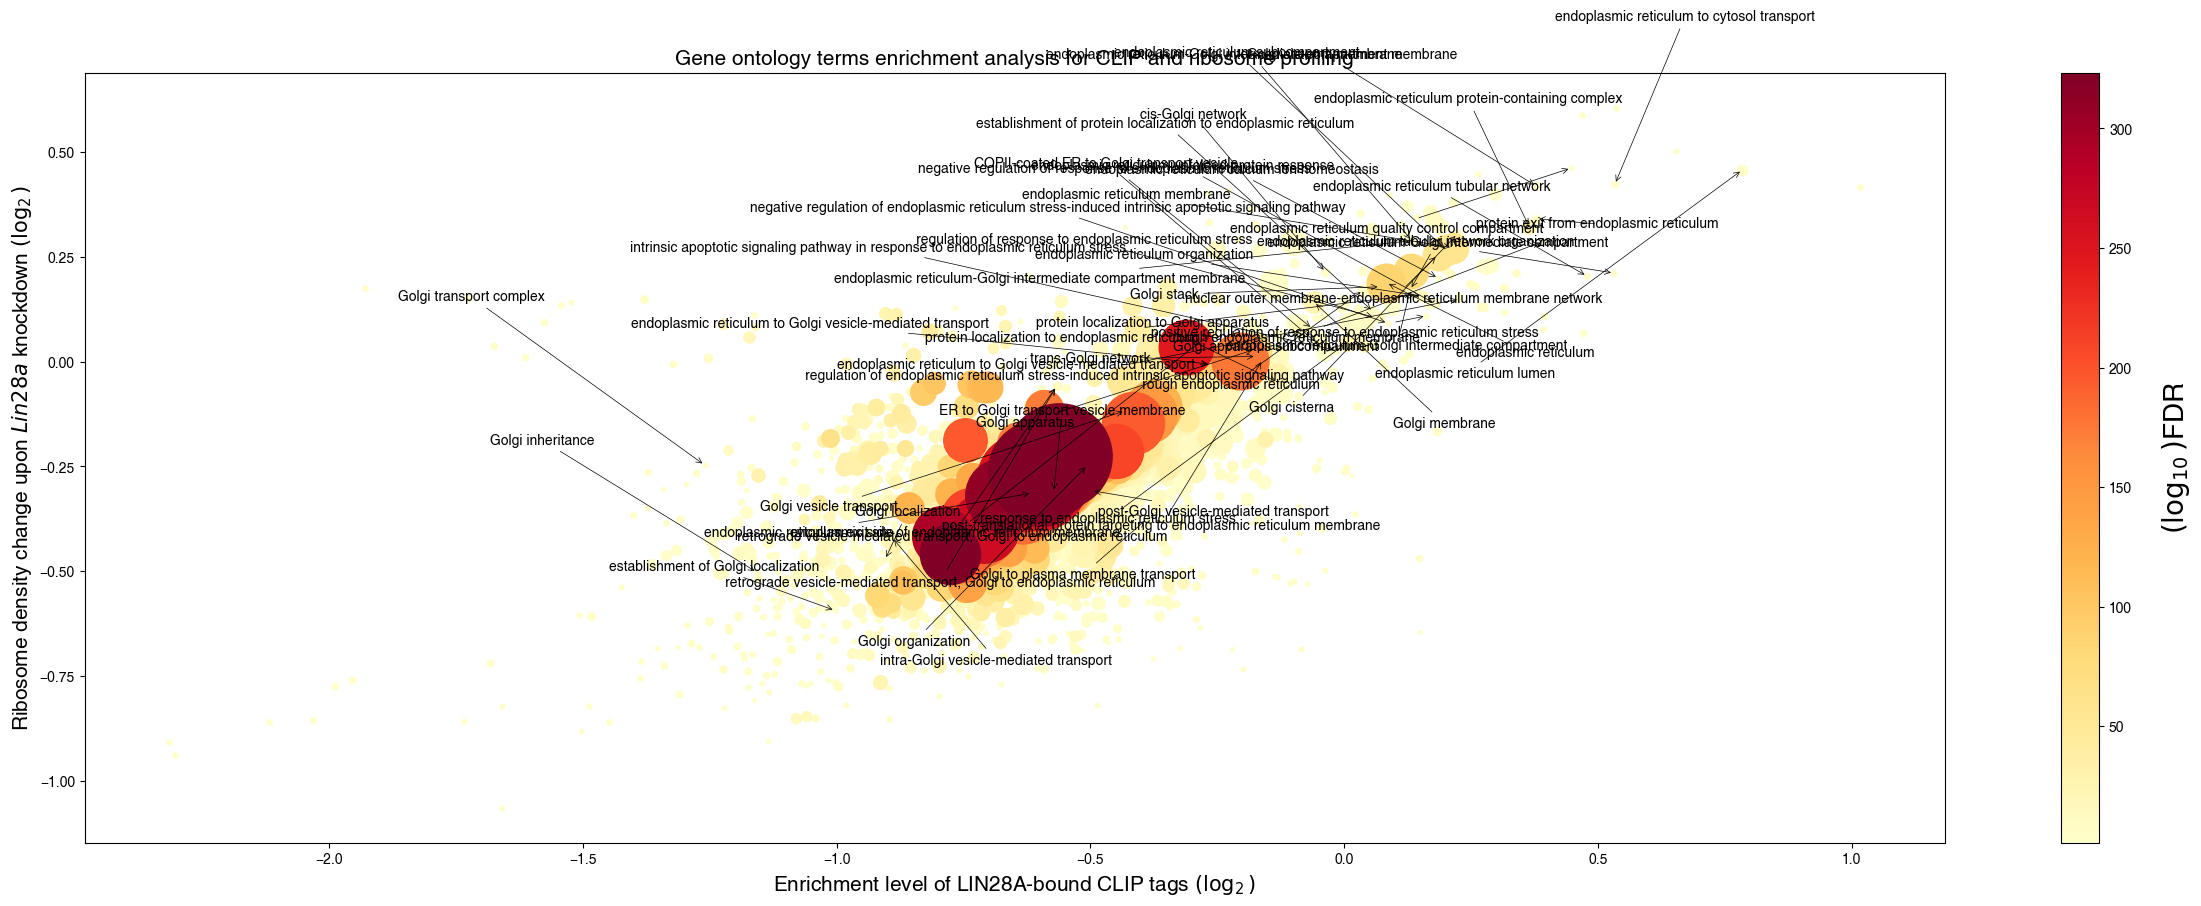

In [239]:
plt.figure(figsize=(30, 10))

cmap = get_cmap('YlOrRd')
norm = Normalize(vmin=term_stats_gpro_nonrank['-log10(p_value)'].min(), vmax=term_stats_gpro_nonrank['-log10(p_value)'].max())

for i, row in term_stats_gpro_nonrank.iterrows():
    plt.scatter(
        row['avg_enrichment'],
        row['avg_change'],
        s=row['gene_count'] * 1,
        color=cmap(norm(row['-log10(p_value)'])),
        alpha=1,
        zorder=row['-log10(p_value)']
    )

for i, row in term_stats_gpro_nonrank.iterrows():
    for j in range(len(term_list)):
            if term_list[j] in (term_stats_gpro_nonrank['name'][i]):
                plt.annotate(row['name'],
                     xy = [row['avg_enrichment'],row['avg_change']],
                     xytext=(row['avg_enrichment'] + np.random.uniform(low=-0.5,high=0.5, size=len(term_stats_gpro_nonrank))[i], 
                             row['avg_change'] + np.random.uniform(low=-0.5,high=0.5, size=len(term_stats_gpro_nonrank))[i]),
                     fontsize=10, 
                     ha='right', 
                     va='center', 
                     arrowprops=dict(facecolor='black', arrowstyle='->', lw=0.5),
                     zorder=1000)

plt.xlabel(r'Enrichment level of LIN28A-bound CLIP tags $(\log_2)$', fontdict={'fontsize': 15})
plt.ylabel(r'Ribosome density change upon $Lin28a$ knockdown $(\log_2)$', fontdict={'fontsize': 15})
plt.title('Gene ontology terms enrichment analysis for CLIP and ribosome profiling', fontdict={'fontsize': 15})

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label(r'$(\log_{10})$''FDR', labelpad=20, fontsize=20)
plt.show()

In [240]:
GOterm_list

['glycosaminoglycan metabolic process',
 'endoplasmic reticulum lumen',
 'cell surface',
 'calcium ion binding',
 'Golgi appartatus',
 'nucleus',
 'cytosol',
 'mitochondrion',
 'endoplasmic reticulumextracellular region',
 'endoplasmic reticulum membrane',
 'nucleosome',
 'nucleosome assembly',
 'Golgi membrane',
 'Golgi apparatus part']

/tmp/ipykernel_4145512/4081181238.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('YlOrRd')


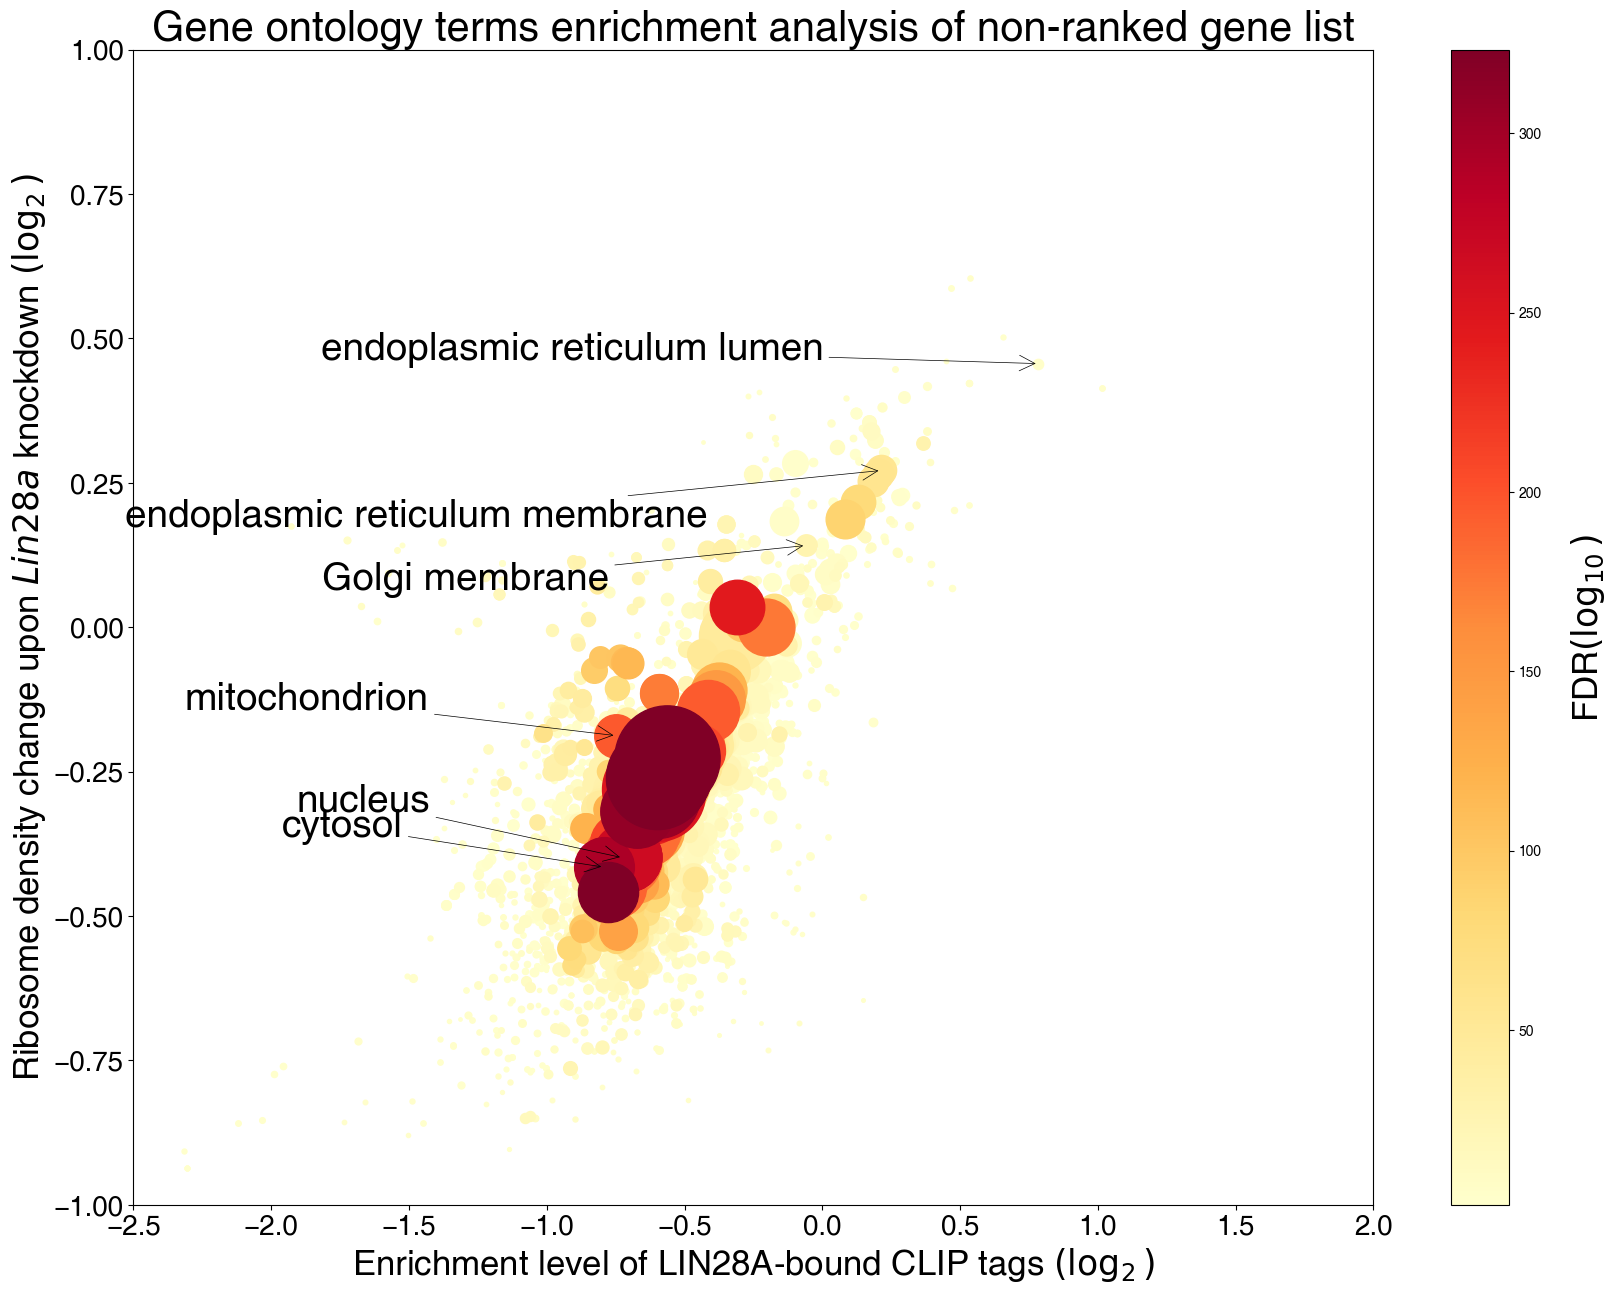

In [283]:
plt.figure(figsize=(20, 15))

cmap = get_cmap('YlOrRd')
norm = Normalize(vmin=term_stats_gpro_nonrank['-log10(p_value)'].min(), vmax=term_stats_gpro_nonrank['-log10(p_value)'].max())

for i, row in term_stats_gpro_nonrank.iterrows():
    plt.scatter(
        row['avg_enrichment'],
        row['avg_change'],
        s=row['gene_count'] * 1,
        color=cmap(norm(row['-log10(p_value)'])),
        alpha=1,
        zorder=row['-log10(p_value)']
    )

for i, row in term_stats_gpro_nonrank.iterrows():
    if term_stats_gpro_nonrank['name'][i] in GOterm_list:
        plt.annotate(row['name'],
                     xy = [row['avg_enrichment'],row['avg_change']],
                     xytext=(row['avg_enrichment'] + np.random.uniform(low=-0.8,high=-0.6, size=len(term_stats_gpro_nonrank))[i], 
                             row['avg_change'] + np.random.uniform(low=-0.1,high=0.1, size=len(term_stats_gpro_nonrank))[i]),
                     fontsize=28, 
                     ha='right', 
                     va='center', 
                     arrowprops=dict(facecolor='black', arrowstyle='->', lw=0.5),
                     zorder=1000)


plt.xlabel(r'Enrichment level of LIN28A-bound CLIP tags $(\log_2)$', fontdict={'fontsize': 25})
plt.ylabel(r'Ribosome density change upon $Lin28a$ knockdown $(\log_2)$', fontdict={'fontsize': 25})
plt.title('Gene ontology terms enrichment analysis of non-ranked gene list', fontdict={'fontsize': 30})

plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 

plt.xlim(-2.5, 2)
plt.ylim(-1, 1)

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label('FDR' r'$(\log_{10})$', labelpad=20, fontsize=25)
plt.show()

Preranked GO term analysis with GProfiler

In [243]:
prerank_result_clip = gp2.profile(organism='mmusculus', 
                                  query= preranked_clip.iloc[:,0].tolist(), 
                                  sources=["GO:BP", "GO:MF", "GO:CC"], 
                                  ordered=True, no_evidences=False,
                                  user_threshold= 0.05)
prerank_result_clip.head()

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
0,GO:CC,GO:0005654,nucleoplasm,4.940656e-324,True,"""That part of the nuclear content other than t...",3883,5906,1834,26995,0.310532,0.472315,query_1,"[GO:0031981, GO:0110165]","[NCBP3, BPNT2, ATP2B1, LNPK, UBXN8, BMPR2, MKI...","[[ISO, IEA], [ISO, IEA], [ISO, IEA], [ISO, IEA..."
1,GO:CC,GO:0043231,intracellular membrane-bounded organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",14435,4389,3471,26995,0.790841,0.240457,query_1,"[GO:0043227, GO:0043229]","[MT-TL1, NCBP3, PGRMC1, LNPEP, STIM2, NDUFA5, ...","[[TAS], [ISS, ISO, IBA, IEA], [IDA, IBA, IEA],..."
2,GO:CC,GO:0005622,intracellular anatomical structure,4.940656e-324,True,"""A component of a cell contained within (but n...",17412,3981,3555,26995,0.892992,0.204170,query_1,[GO:0110165],"[MT-TL1, NCBP3, PGRMC1, LNPEP, ACVR2A, N-R5S10...","[[TAS], [ISS, ISO, IBA, IEA], [IDA, IBA, IEA],..."
3,GO:CC,GO:0005737,cytoplasm,4.940656e-324,True,"""The contents of a cell excluding the plasma m...",11561,3330,2449,26995,0.735435,0.211833,query_1,"[GO:0005622, GO:0110165]","[MT-TL1, NCBP3, PGRMC1, LNPEP, ACVR2A, STIM2, ...","[[TAS], [ISS, ISO, IEA], [IDA, IBA, IEA], [IDA..."
4,GO:CC,GO:0043226,organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",16169,4462,3761,26995,0.842896,0.232606,query_1,[GO:0110165],"[MT-TL1, NCBP3, PGRMC1, NECTIN3, LNPEP, N-R5S1...","[[TAS], [ISS, ISO, IBA, IEA], [IDA, IBA, IEA],..."


In [244]:
prerank_result_rdc = gp2.profile(organism='mmusculus', 
                                 query= preranked_rdc.iloc[:,0].tolist(), 
                                 sources=["GO:BP", "GO:MF", "GO:CC"], 
                                 ordered=True, no_evidences=False,
                                 user_threshold= 0.05)
prerank_result_rdc.head()

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
0,GO:CC,GO:0005622,intracellular anatomical structure,4.940656e-324,True,"""A component of a cell contained within (but n...",17412,4375,3856,26995,0.881371,0.221456,query_1,[GO:0110165],"[UQCRB, TMX1, MT-RNR2, LAMP2, NCEH1, LRRC8D, T...","[[IEA], [ISO, IEA], [TAS, IEA], [IDA, IMP, ISO..."
1,GO:CC,GO:0005654,nucleoplasm,4.940656e-324,True,"""That part of the nuclear content other than t...",3883,5961,1844,26995,0.309344,0.474891,query_1,"[GO:0031981, GO:0110165]","[COMMD9, BPNT2, TGOLN1, TMEM70, FZD10, SLC3A2,...","[[ISO, IEA], [ISO, IEA], [ISO], [ISO, IEA], [I..."
2,GO:CC,GO:0043231,intracellular membrane-bounded organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",14435,4522,3557,26995,0.786599,0.246415,query_1,"[GO:0043227, GO:0043229]","[UQCRB, TMX1, MT-RNR2, LAMP2, NCEH1, LRRC8D, T...","[[IEA], [ISO, IEA], [TAS], [IDA, IMP, ISO, IBA..."
3,GO:CC,GO:0005737,cytoplasm,4.940656e-324,True,"""The contents of a cell excluding the plasma m...",11561,3029,2277,26995,0.751733,0.196955,query_1,"[GO:0005622, GO:0110165]","[UQCRB, TMX1, MT-RNR2, LAMP2, NCEH1, LRRC8D, T...","[[IEA], [ISO, IEA], [TAS], [IDA, IMP, ISO, IBA..."
4,GO:CC,GO:0043229,intracellular organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",15836,4680,3868,26995,0.826496,0.244254,query_1,"[GO:0005622, GO:0043226]","[UQCRB, TMX1, MT-RNR2, LAMP2, NCEH1, LRRC8D, T...","[[IEA], [ISO, IEA], [TAS, IEA], [IDA, IMP, ISO..."


In [245]:
term_table_expanded_gpro_clip = prerank_result_clip.explode('intersections').reset_index(drop=True)
term_table_expanded_gpro_clip = term_table_expanded_gpro_clip.rename(columns={'intersections': 'external_gene_name'})
term_table_expanded_gpro_clip

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,external_gene_name,evidences
0,GO:CC,GO:0005654,nucleoplasm,4.940656e-324,True,"""That part of the nuclear content other than t...",3883,5906,1834,26995,0.310532,0.472315,query_1,"[GO:0031981, GO:0110165]",NCBP3,"[[ISO, IEA], [ISO, IEA], [ISO, IEA], [ISO, IEA..."
1,GO:CC,GO:0005654,nucleoplasm,4.940656e-324,True,"""That part of the nuclear content other than t...",3883,5906,1834,26995,0.310532,0.472315,query_1,"[GO:0031981, GO:0110165]",BPNT2,"[[ISO, IEA], [ISO, IEA], [ISO, IEA], [ISO, IEA..."
2,GO:CC,GO:0005654,nucleoplasm,4.940656e-324,True,"""That part of the nuclear content other than t...",3883,5906,1834,26995,0.310532,0.472315,query_1,"[GO:0031981, GO:0110165]",ATP2B1,"[[ISO, IEA], [ISO, IEA], [ISO, IEA], [ISO, IEA..."
3,GO:CC,GO:0005654,nucleoplasm,4.940656e-324,True,"""That part of the nuclear content other than t...",3883,5906,1834,26995,0.310532,0.472315,query_1,"[GO:0031981, GO:0110165]",LNPK,"[[ISO, IEA], [ISO, IEA], [ISO, IEA], [ISO, IEA..."
4,GO:CC,GO:0005654,nucleoplasm,4.940656e-324,True,"""That part of the nuclear content other than t...",3883,5906,1834,26995,0.310532,0.472315,query_1,"[GO:0031981, GO:0110165]",UBXN8,"[[ISO, IEA], [ISO, IEA], [ISO, IEA], [ISO, IEA..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543122,GO:CC,GO:0070390,transcription export complex 2,4.976860e-02,True,"""A protein complex that couples SAGA-dependent...",5,4527,5,26995,0.001104,1.000000,query_1,[GO:0140513],CETN3,"[[ISS, ISO, IEA], [ISS, ISO, IEA], [ISS, ISO, ..."
543123,GO:CC,GO:0070390,transcription export complex 2,4.976860e-02,True,"""A protein complex that couples SAGA-dependent...",5,4527,5,26995,0.001104,1.000000,query_1,[GO:0140513],CETN2,"[[ISS, ISO, IEA], [ISS, ISO, IEA], [ISS, ISO, ..."
543124,GO:CC,GO:0070390,transcription export complex 2,4.976860e-02,True,"""A protein complex that couples SAGA-dependent...",5,4527,5,26995,0.001104,1.000000,query_1,[GO:0140513],ENY2,"[[ISS, ISO, IEA], [ISS, ISO, IEA], [ISS, ISO, ..."
543125,GO:CC,GO:0070390,transcription export complex 2,4.976860e-02,True,"""A protein complex that couples SAGA-dependent...",5,4527,5,26995,0.001104,1.000000,query_1,[GO:0140513],PCID2,"[[ISS, ISO, IEA], [ISS, ISO, IEA], [ISS, ISO, ..."


In [246]:
term_table_expanded_gpro_rdc = prerank_result_rdc.explode('intersections').reset_index(drop=True)
term_table_expanded_gpro_rdc = term_table_expanded_gpro_rdc.rename(columns={'intersections': 'external_gene_name'})
term_table_expanded_gpro_rdc

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,external_gene_name,evidences
0,GO:CC,GO:0005622,intracellular anatomical structure,4.940656e-324,True,"""A component of a cell contained within (but n...",17412,4375,3856,26995,0.881371,0.221456,query_1,[GO:0110165],UQCRB,"[[IEA], [ISO, IEA], [TAS, IEA], [IDA, IMP, ISO..."
1,GO:CC,GO:0005622,intracellular anatomical structure,4.940656e-324,True,"""A component of a cell contained within (but n...",17412,4375,3856,26995,0.881371,0.221456,query_1,[GO:0110165],TMX1,"[[IEA], [ISO, IEA], [TAS, IEA], [IDA, IMP, ISO..."
2,GO:CC,GO:0005622,intracellular anatomical structure,4.940656e-324,True,"""A component of a cell contained within (but n...",17412,4375,3856,26995,0.881371,0.221456,query_1,[GO:0110165],MT-RNR2,"[[IEA], [ISO, IEA], [TAS, IEA], [IDA, IMP, ISO..."
3,GO:CC,GO:0005622,intracellular anatomical structure,4.940656e-324,True,"""A component of a cell contained within (but n...",17412,4375,3856,26995,0.881371,0.221456,query_1,[GO:0110165],LAMP2,"[[IEA], [ISO, IEA], [TAS, IEA], [IDA, IMP, ISO..."
4,GO:CC,GO:0005622,intracellular anatomical structure,4.940656e-324,True,"""A component of a cell contained within (but n...",17412,4375,3856,26995,0.881371,0.221456,query_1,[GO:0110165],NCEH1,"[[IEA], [ISO, IEA], [TAS, IEA], [IDA, IMP, ISO..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544674,GO:BP,GO:0035113,embryonic appendage morphogenesis,4.985137e-02,True,"""The process, occurring in the embryo, by whic...",132,1549,21,26944,0.013557,0.159091,query_1,"[GO:0035107, GO:0048598]",BMP4,"[[IMP], [IMP], [IMP, IGI], [IGI], [IGI], [IGI]..."
544675,GO:BP,GO:0035113,embryonic appendage morphogenesis,4.985137e-02,True,"""The process, occurring in the embryo, by whic...",132,1549,21,26944,0.013557,0.159091,query_1,"[GO:0035107, GO:0048598]",B9D1,"[[IMP], [IMP], [IMP, IGI], [IGI], [IGI], [IGI]..."
544676,GO:BP,GO:0035113,embryonic appendage morphogenesis,4.985137e-02,True,"""The process, occurring in the embryo, by whic...",132,1549,21,26944,0.013557,0.159091,query_1,"[GO:0035107, GO:0048598]",IFT52,"[[IMP], [IMP], [IMP, IGI], [IGI], [IGI], [IGI]..."
544677,GO:BP,GO:0035113,embryonic appendage morphogenesis,4.985137e-02,True,"""The process, occurring in the embryo, by whic...",132,1549,21,26944,0.013557,0.159091,query_1,"[GO:0035107, GO:0048598]",LRP5,"[[IMP], [IMP], [IMP, IGI], [IGI], [IGI], [IGI]..."


In [247]:
term_table_expanded_gpro_merged = pd.merge(term_table_expanded_gpro_clip, term_table_expanded_gpro_rdc, on=['source','name','external_gene_name','native'], how='inner')
term_table_expanded_gpro_merged

,source,native,name,p_value_x,significant_x,description_x,term_size_x,query_size_x,intersection_size_x,effective_domain_size_x,...,description_y,term_size_y,query_size_y,intersection_size_y,effective_domain_size_y,precision_y,recall_y,query_y,parents_y,evidences_y
0,GO:CC,GO:0005654,nucleoplasm,4.940656e-324,True,"""That part of the nuclear content other than t...",3883,5906,1834,26995,...,"""That part of the nuclear content other than t...",3883,5961,1844,26995,0.309344,0.474891,query_1,"[GO:0031981, GO:0110165]","[[ISO, IEA], [ISO, IEA], [ISO], [ISO, IEA], [I..."
1,GO:CC,GO:0005654,nucleoplasm,4.940656e-324,True,"""That part of the nuclear content other than t...",3883,5906,1834,26995,...,"""That part of the nuclear content other than t...",3883,5961,1844,26995,0.309344,0.474891,query_1,"[GO:0031981, GO:0110165]","[[ISO, IEA], [ISO, IEA], [ISO], [ISO, IEA], [I..."
2,GO:CC,GO:0005654,nucleoplasm,4.940656e-324,True,"""That part of the nuclear content other than t...",3883,5906,1834,26995,...,"""That part of the nuclear content other than t...",3883,5961,1844,26995,0.309344,0.474891,query_1,"[GO:0031981, GO:0110165]","[[ISO, IEA], [ISO, IEA], [ISO], [ISO, IEA], [I..."
3,GO:CC,GO:0005654,nucleoplasm,4.940656e-324,True,"""That part of the nuclear content other than t...",3883,5906,1834,26995,...,"""That part of the nuclear content other than t...",3883,5961,1844,26995,0.309344,0.474891,query_1,"[GO:0031981, GO:0110165]","[[ISO, IEA], [ISO, IEA], [ISO], [ISO, IEA], [I..."
4,GO:CC,GO:0005654,nucleoplasm,4.940656e-324,True,"""That part of the nuclear content other than t...",3883,5906,1834,26995,...,"""That part of the nuclear content other than t...",3883,5961,1844,26995,0.309344,0.474891,query_1,"[GO:0031981, GO:0110165]","[[ISO, IEA], [ISO, IEA], [ISO], [ISO, IEA], [I..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520931,GO:CC,GO:0042765,GPI-anchor transamidase complex,4.965871e-02,True,"""An enzyme complex which in humans and yeast c...",5,4525,5,26995,...,"""An enzyme complex which in humans and yeast c...",5,1359,5,26995,0.003679,1.000000,query_1,"[GO:0005789, GO:0008303, GO:0098796, GO:0140534]","[[ISS, ISO, IBA, IEA], [ISS, ISO, IBA, IEA], [..."
520932,GO:CC,GO:0042765,GPI-anchor transamidase complex,4.965871e-02,True,"""An enzyme complex which in humans and yeast c...",5,4525,5,26995,...,"""An enzyme complex which in humans and yeast c...",5,1359,5,26995,0.003679,1.000000,query_1,"[GO:0005789, GO:0008303, GO:0098796, GO:0140534]","[[ISS, ISO, IBA, IEA], [ISS, ISO, IBA, IEA], [..."
520933,GO:CC,GO:0042765,GPI-anchor transamidase complex,4.965871e-02,True,"""An enzyme complex which in humans and yeast c...",5,4525,5,26995,...,"""An enzyme complex which in humans and yeast c...",5,1359,5,26995,0.003679,1.000000,query_1,"[GO:0005789, GO:0008303, GO:0098796, GO:0140534]","[[ISS, ISO, IBA, IEA], [ISS, ISO, IBA, IEA], [..."
520934,GO:CC,GO:0042765,GPI-anchor transamidase complex,4.965871e-02,True,"""An enzyme complex which in humans and yeast c...",5,4525,5,26995,...,"""An enzyme complex which in humans and yeast c...",5,1359,5,26995,0.003679,1.000000,query_1,"[GO:0005789, GO:0008303, GO:0098796, GO:0140534]","[[ISS, ISO, IBA, IEA], [ISS, ISO, IBA, IEA], [..."


In [248]:
merged_table_gpro = pd.merge(term_table_expanded_gpro_merged, total_results, on='external_gene_name')
merged_table_gpro['log2FC_clip_enrichment'] = np.log2(merged_table_gpro['clip_enrichment'])
merged_table_gpro['log2FC_rden_change'] = np.log2(merged_table_gpro['rden_change'])
merged_table_gpro

,source,native,name,p_value_x,significant_x,description_x,term_size_x,query_size_x,intersection_size_x,effective_domain_size_x,...,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,log2FC_clip_enrichment,log2FC_rden_change
0,GO:CC,GO:0005654,nucleoplasm,4.940656e-324,True,"""That part of the nuclear content other than t...",3883,5906,1834,26995,...,55.792832,104.050906,112.916675,128.468317,22.421458,40.438262,33.247113,0.630826,5.055157,-0.664687
1,GO:CC,GO:0043226,organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",16169,4462,3761,26995,...,55.792832,104.050906,112.916675,128.468317,22.421458,40.438262,33.247113,0.630826,5.055157,-0.664687
2,GO:CC,GO:0043229,intracellular organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",15836,4362,3646,26995,...,55.792832,104.050906,112.916675,128.468317,22.421458,40.438262,33.247113,0.630826,5.055157,-0.664687
3,GO:CC,GO:0043227,membrane-bounded organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",14934,4552,3650,26995,...,55.792832,104.050906,112.916675,128.468317,22.421458,40.438262,33.247113,0.630826,5.055157,-0.664687
4,GO:CC,GO:0032991,protein-containing complex,1.905060e-282,True,"""A stable assembly of two or more macromolecul...",7427,6017,2795,26995,...,55.792832,104.050906,112.916675,128.468317,22.421458,40.438262,33.247113,0.630826,5.055157,-0.664687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520931,GO:BP,GO:0043009,chordate embryonic development,2.535528e-42,True,"""The process whose specific outcome is the pro...",791,5997,353,26944,...,79.418823,423.752414,587.497601,419.432828,63.800114,57.154866,0.513561,0.796938,-0.961392,-0.327461
520932,GO:BP,GO:0001701,in utero embryonic development,6.202440e-35,True,"""The process whose specific outcome is the pro...",516,5997,247,26944,...,79.418823,423.752414,587.497601,419.432828,63.800114,57.154866,0.513561,0.796938,-0.961392,-0.327461
520933,GO:MF,GO:0030234,enzyme regulator activity,5.118666e-11,True,"""Binds to and modulates the activity of an enz...",1264,6010,416,25063,...,0.000000,45.496769,48.475584,45.754405,23.576211,24.676892,0.707583,0.901765,-0.499029,-0.149176
520934,GO:MF,GO:0008047,enzyme activator activity,1.550001e-08,True,"""Binds to and increases the activity of an enz...",545,5983,198,25063,...,0.000000,45.496769,48.475584,45.754405,23.576211,24.676892,0.707583,0.901765,-0.499029,-0.149176


In [249]:
term_stats_gpro = merged_table_gpro.groupby(['native']).agg(
    source=('source','first'),
    name=('name', 'first'),
    p_value_clip = ('p_value_x', 'first'),
    p_value_rdc = ('p_value_y', 'first'),
    avg_enrichment=('log2FC_clip_enrichment', 'mean'),
    avg_change=('log2FC_rden_change', 'mean'),
    gene_count=('external_gene_name', 'count')
).reset_index()
term_stats_gpro['p_value_max'] = term_stats_gpro[['p_value_clip', 'p_value_rdc']].max(axis=1)
term_stats_gpro['-log10(p_value_max)'] = -np.log10(term_stats_gpro['p_value_max'])
term_stats_gpro

,native,source,name,p_value_clip,p_value_rdc,avg_enrichment,avg_change,gene_count,p_value_max,-log10(p_value_max)
0,GO:0000002,GO:BP,mitochondrial genome maintenance,1.292523e-03,2.401754e-03,-0.966861,-0.424680,21,2.401754e-03,2.619471
1,GO:0000003,GO:BP,reproduction,1.717538e-05,2.574065e-04,-0.107982,-0.195157,424,2.574065e-04,3.589380
2,GO:0000018,GO:BP,regulation of DNA recombination,2.438359e-10,6.963510e-10,-0.805686,-0.421701,67,6.963510e-10,9.157172
3,GO:0000027,GO:BP,ribosomal large subunit assembly,2.371622e-07,2.429716e-07,-1.174805,-0.466259,22,2.429716e-07,6.614444
4,GO:0000028,GO:BP,ribosomal small subunit assembly,5.206531e-07,2.862985e-07,-1.277342,-0.265465,18,5.206531e-07,6.283452
...,...,...,...,...,...,...,...,...,...,...
2740,GO:2001242,GO:BP,regulation of intrinsic apoptotic signaling pa...,1.919985e-17,1.944578e-17,-0.601601,-0.240753,100,1.944578e-17,16.711175
2741,GO:2001243,GO:BP,negative regulation of intrinsic apoptotic sig...,1.022097e-11,3.244938e-12,-0.416723,-0.196675,60,1.022097e-11,10.990508
2742,GO:2001244,GO:BP,positive regulation of intrinsic apoptotic sig...,5.998427e-03,4.230066e-03,-0.984140,-0.303711,33,5.998427e-03,2.221963
2743,GO:2001251,GO:BP,negative regulation of chromosome organization,5.085007e-22,5.136789e-22,-0.708932,-0.495755,67,5.136789e-22,21.289308


In [250]:
term_stats_gpro.loc[term_stats_gpro['name'].isin(GOterm_list)]

,native,source,name,p_value_clip,p_value_rdc,avg_enrichment,avg_change,gene_count,p_value_max,-log10(p_value_max)
23,GO:0000139,GO:CC,Golgi membrane,6.385400e-35,4.115509e-44,0.391733,0.439175,159,6.385400e-35,34.194812
226,GO:0005509,GO:MF,calcium ion binding,2.647960e-06,7.561497e-06,1.552386,0.572422,43,7.561497e-06,5.121392
237,GO:0005634,GO:CC,nucleus,1.175106e-154,2.853490e-154,-0.722345,-0.399118,3133,2.853490e-154,153.544624
259,GO:0005739,GO:CC,mitochondrion,4.970934e-186,7.306596e-187,-0.732500,-0.169729,969,4.970934e-186,185.303562
290,GO:0005788,GO:CC,endoplasmic reticulum lumen,2.200149e-18,1.517361e-22,1.189401,0.592570,37,2.200149e-18,17.657548
291,GO:0005789,GO:CC,endoplasmic reticulum membrane,1.038251e-90,3.016774e-139,1.077673,0.549734,250,1.038251e-90,89.983698
307,GO:0005829,GO:CC,cytosol,7.029762e-276,1.938694e-275,-0.791302,-0.415558,1849,1.938694e-275,274.712491
712,GO:0009986,GO:CC,cell surface,5.083980e-14,1.597677e-27,1.414465,0.746341,67,5.083980e-14,13.293796


/tmp/ipykernel_4145512/90937890.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('YlOrRd')


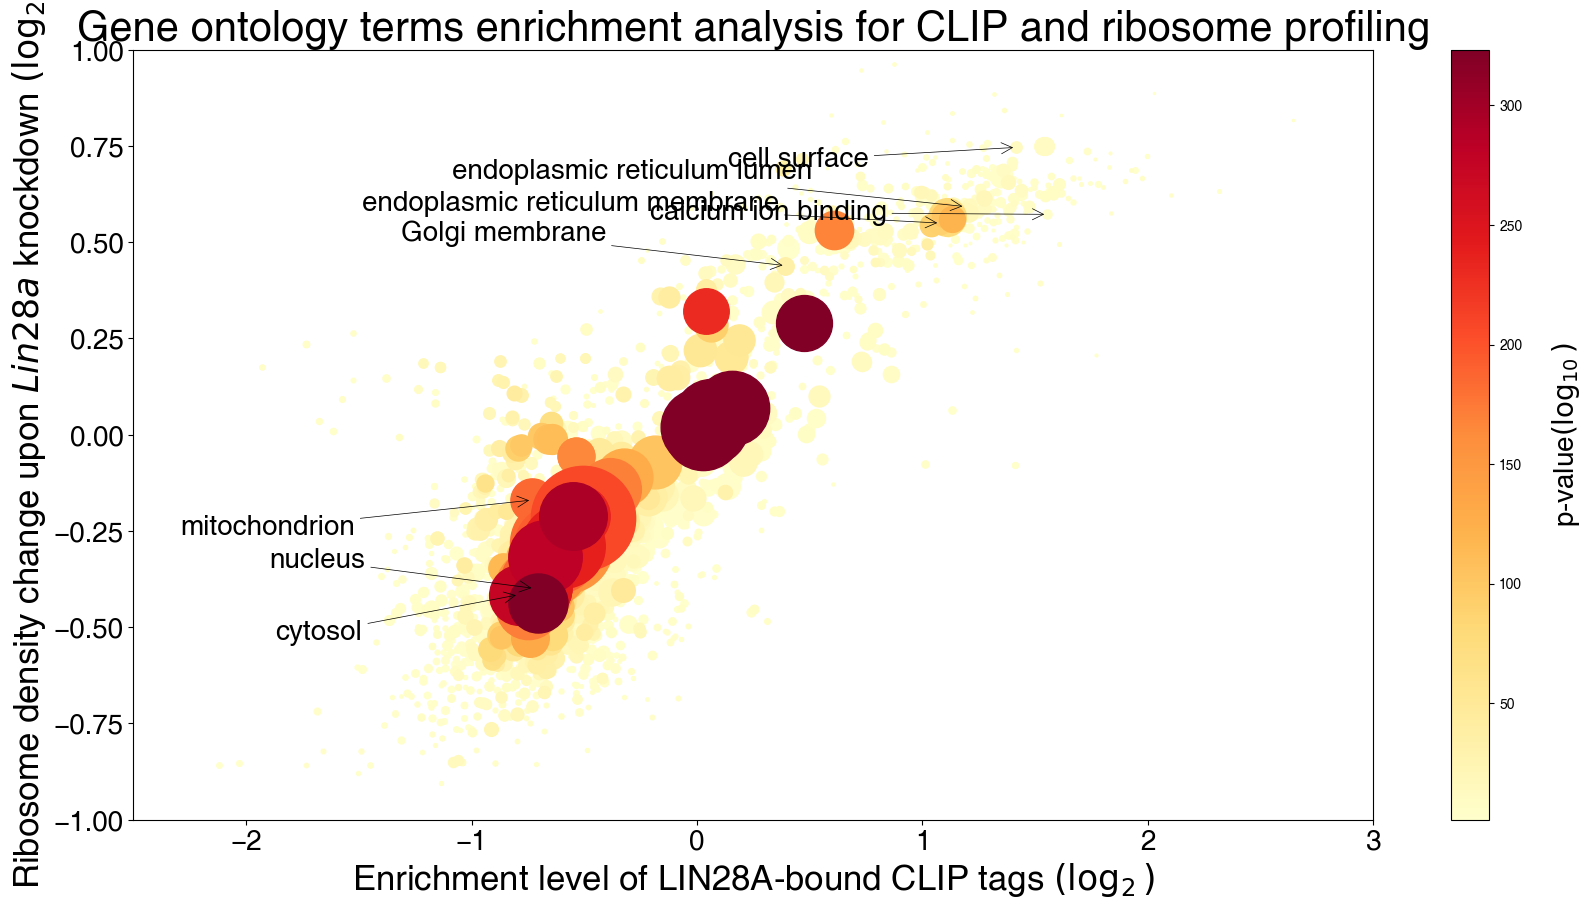

In [281]:
plt.figure(figsize=(20, 10))

cmap = get_cmap('YlOrRd')
norm = Normalize(vmin=term_stats_gpro['-log10(p_value_max)'].min(), vmax=term_stats_gpro['-log10(p_value_max)'].max())

for i, row in term_stats_gpro.iterrows():
    plt.scatter(
        row['avg_enrichment'],
        row['avg_change'],
        s=row['gene_count'] * 1,
        color=cmap(norm(row['-log10(p_value_max)'])),
        alpha=1,
        zorder=row['-log10(p_value_max)']
    )

for i, row in term_stats_gpro.iterrows():
    if term_stats_gpro['name'][i] in GOterm_list:
        plt.annotate(row['name'],
                     xy = [row['avg_enrichment'],row['avg_change']],
                     xytext=(row['avg_enrichment'] + np.random.uniform(low=-0.8,high=-0.6, size=len(term_stats_gpro_nonrank))[i], 
                             row['avg_change'] + np.random.uniform(low=-0.1,high=0.1, size=len(term_stats_gpro_nonrank))[i]),
                     fontsize=20, 
                     ha='right', 
                     va='center', 
                     arrowprops=dict(facecolor='black', arrowstyle='->', lw=0.5),
                     zorder=1000)


plt.xlabel(r'Enrichment level of LIN28A-bound CLIP tags $(\log_2)$', fontdict={'fontsize': 25})
plt.ylabel(r'Ribosome density change upon $Lin28a$ knockdown $(\log_2)$', fontdict={'fontsize': 25})
plt.title('Gene ontology terms enrichment analysis for CLIP and ribosome profiling', fontdict={'fontsize': 30})

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(-2.5, 3)
plt.ylim(-1,1)
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label('p-value' r'$(\log_{10})$', labelpad=20, fontsize=20)
plt.show()

/tmp/ipykernel_4145512/608722752.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('YlOrRd')


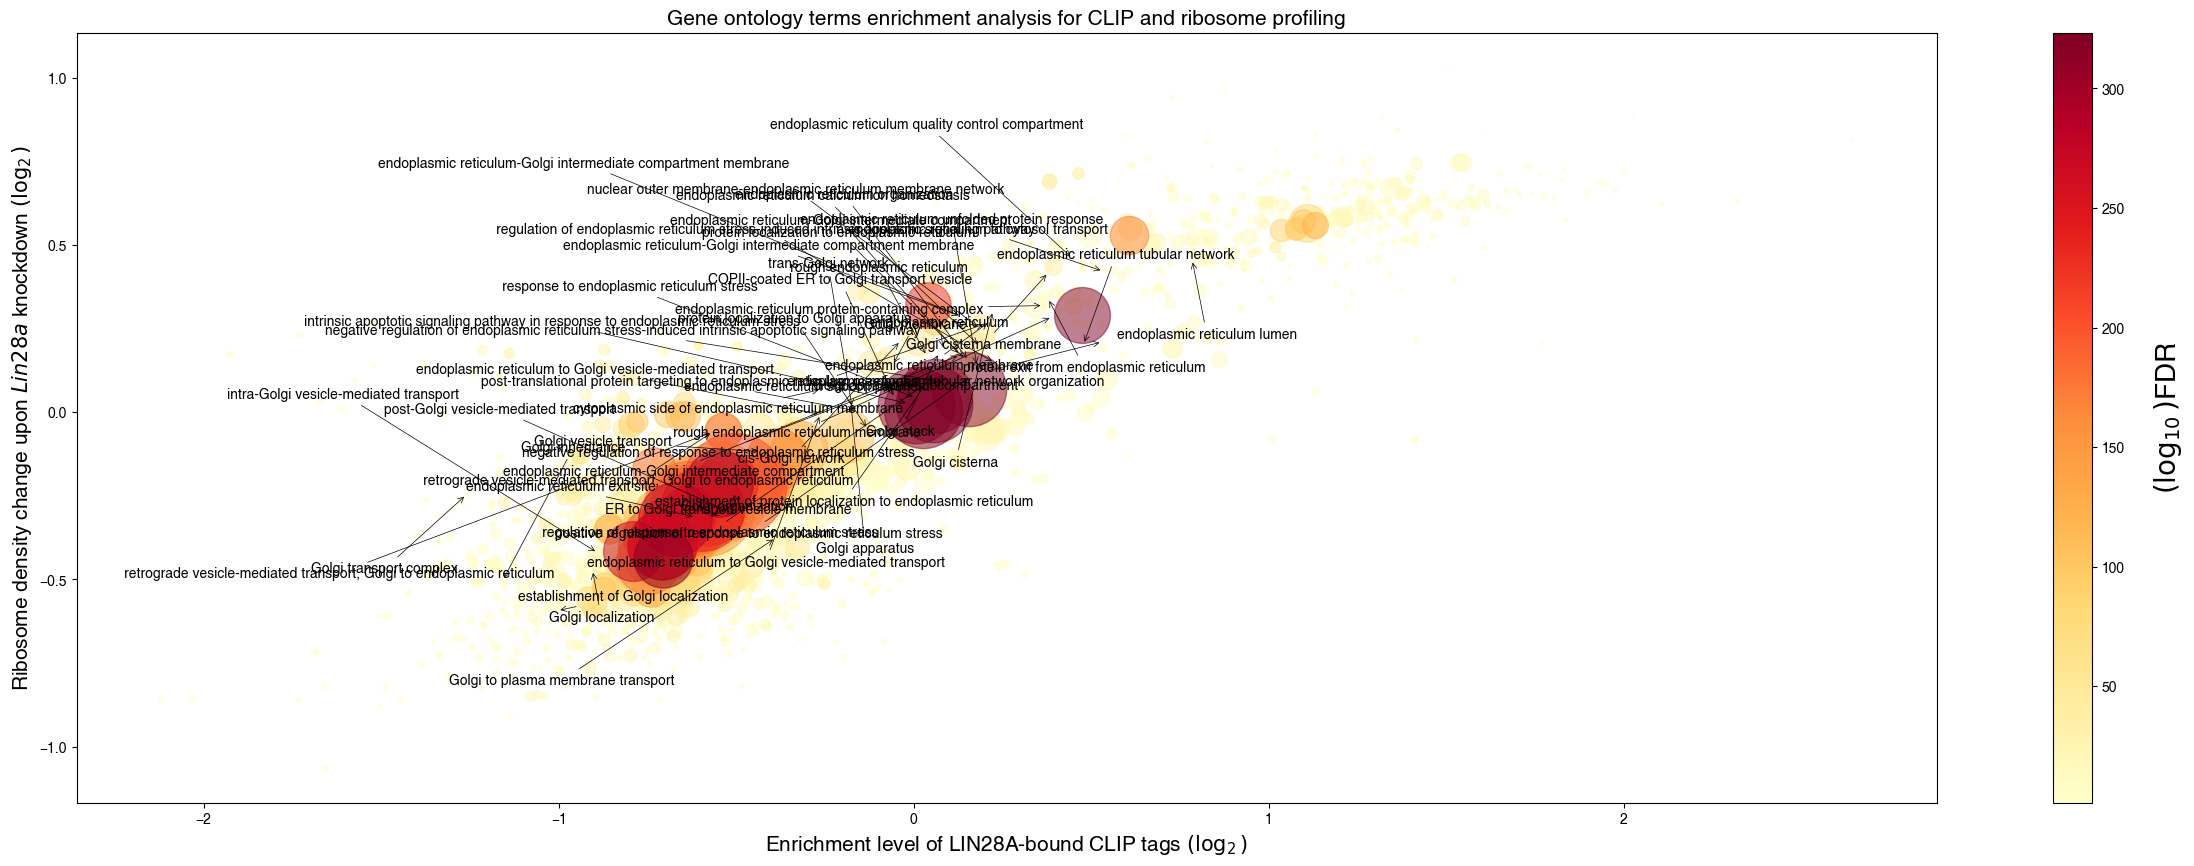

In [252]:
plt.figure(figsize=(30, 10))

cmap = get_cmap('YlOrRd')
norm = Normalize(vmin=term_stats_gpro['-log10(p_value_max)'].min(), vmax=term_stats_gpro['-log10(p_value_max)'].max())

for i, row in term_stats_gpro.iterrows():
    plt.scatter(
        row['avg_enrichment'],
        row['avg_change'],
        s=row['gene_count'] * 1,
        color=cmap(norm(row['-log10(p_value_max)'])),
        alpha=0.5,
        zorder=row['-log10(p_value_max)']
    )

for i, row in term_stats_gpro_nonrank.iterrows():
    for j in range(len(term_list)):
            if term_list[j] in (term_stats_gpro_nonrank['name'][i]):
                plt.annotate(row['name'],
                     xy = [row['avg_enrichment'],row['avg_change']],
                     xytext=(row['avg_enrichment'] + np.random.uniform(low=-0.5,high=0.5, size=len(term_stats_gpro_nonrank))[i], 
                             row['avg_change'] + np.random.uniform(low=-0.5,high=0.5, size=len(term_stats_gpro_nonrank))[i]),
                     fontsize=10, 
                     ha='right', 
                     va='center', 
                     arrowprops=dict(facecolor='black', arrowstyle='->', lw=0.5),
                     zorder=1000)
                
plt.xlabel(r'Enrichment level of LIN28A-bound CLIP tags $(\log_2)$', fontdict={'fontsize': 15})
plt.ylabel(r'Ribosome density change upon $Lin28a$ knockdown $(\log_2)$', fontdict={'fontsize': 15})
plt.title('Gene ontology terms enrichment analysis for CLIP and ribosome profiling', fontdict={'fontsize': 15})

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label(r'$(\log_{10})$''FDR', labelpad=20, fontsize=20)
plt.show()

In [253]:
term_stats_gpro_sorted = term_stats_gpro.loc[(term_stats_gpro['p_value_max'] < 1e-4) & 
                                             (term_stats_gpro['gene_count'] > 20)]
term_stats_gpro_sorted

,native,source,name,p_value_clip,p_value_rdc,avg_enrichment,avg_change,gene_count,p_value_max,-log10(p_value_max)
2,GO:0000018,GO:BP,regulation of DNA recombination,2.438359e-10,6.963510e-10,-0.805686,-0.421701,67,6.963510e-10,9.157172
3,GO:0000027,GO:BP,ribosomal large subunit assembly,2.371622e-07,2.429716e-07,-1.174805,-0.466259,22,2.429716e-07,6.614444
6,GO:0000041,GO:BP,transition metal ion transport,1.063771e-06,2.763305e-08,1.310782,0.553035,21,1.063771e-06,5.973152
7,GO:0000045,GO:BP,autophagosome assembly,2.061599e-11,6.151149e-11,-0.753495,-0.161283,60,6.151149e-11,10.211044
8,GO:0000049,GO:MF,tRNA binding,2.032434e-14,1.741941e-14,-0.991872,-0.499009,53,2.032434e-14,13.691984
...,...,...,...,...,...,...,...,...,...,...
2737,GO:2001234,GO:BP,negative regulation of apoptotic signaling pat...,3.696139e-16,1.349571e-16,-0.503168,-0.200293,115,3.696139e-16,15.432252
2740,GO:2001242,GO:BP,regulation of intrinsic apoptotic signaling pa...,1.919985e-17,1.944578e-17,-0.601601,-0.240753,100,1.944578e-17,16.711175
2741,GO:2001243,GO:BP,negative regulation of intrinsic apoptotic sig...,1.022097e-11,3.244938e-12,-0.416723,-0.196675,60,1.022097e-11,10.990508
2743,GO:2001251,GO:BP,negative regulation of chromosome organization,5.085007e-22,5.136789e-22,-0.708932,-0.495755,67,5.136789e-22,21.289308


/tmp/ipykernel_4145512/3729187280.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('YlOrRd')


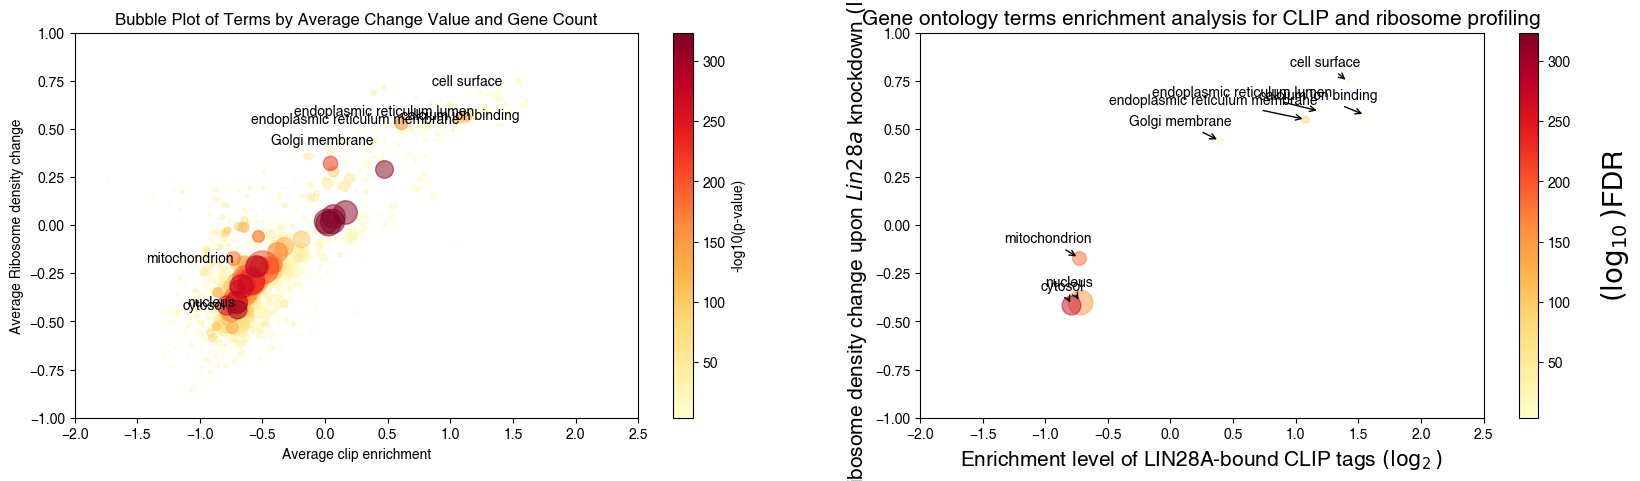

In [254]:
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
cmap = get_cmap('YlOrRd')
norm = Normalize(vmin=term_stats_gpro_sorted['-log10(p_value_max)'].min(), vmax=term_stats_gpro_sorted['-log10(p_value_max)'].max())

for i, row in term_stats_gpro_sorted.iterrows():
    plt.scatter(
        row['avg_enrichment'],
        row['avg_change'],
        s=row['gene_count'] * 0.1,
        color=cmap(norm(row['-log10(p_value_max)'])),
        alpha=0.5,
        zorder=row['-log10(p_value_max)']
    )

for i, row in term_stats_gpro_sorted.iterrows():
    if term_stats_gpro_sorted['name'][i] in GOterm_list:
        plt.text(row['avg_enrichment'], row['avg_change'], row['name'], fontsize=10, ha='right', va='center', zorder=1000)

plt.xlim(-2,2.5)
plt.ylim(-1,1)
plt.xlabel('Average clip enrichment')
plt.ylabel('Average Ribosome density change')
plt.title('Bubble Plot of Terms by Average Change Value and Gene Count')

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label('-log10(p-value)')

plt.subplot(1,2,2)
for i, row in term_stats_gpro_sorted.iterrows():
    if term_stats_gpro_sorted['name'][i] in GOterm_list:   
        plt.scatter(
            row['avg_enrichment'],
            row['avg_change'],
            s=row['gene_count'] * 0.1,
            color=cmap(norm(row['-log10(p_value_max)'])),
            alpha=0.5,
            zorder=row['-log10(p_value_max)']
    )

for i, row in term_stats_gpro_sorted.iterrows():
    if term_stats_gpro_sorted['name'][i] in GOterm_list:
        plt.annotate(row['name'],
                     xy = [row['avg_enrichment'],row['avg_change']],
                     xytext=(row['avg_enrichment'] + 0.1, row['avg_change'] + 0.1),
                     fontsize=10, 
                     ha='right', 
                     va='center', 
                     arrowprops=dict(facecolor='black', arrowstyle='->'),
                     zorder=1000)

plt.xlim(-2,2.5)
plt.ylim(-1,1)
plt.xlabel(r'Enrichment level of LIN28A-bound CLIP tags $(\log_2)$', fontdict={'fontsize': 15})
plt.ylabel(r'Ribosome density change upon $Lin28a$ knockdown $(\log_2)$', fontdict={'fontsize': 15})
plt.title('Gene ontology terms enrichment analysis for CLIP and ribosome profiling', fontdict={'fontsize': 15})

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label(r'$(\log_{10})$''FDR', labelpad=20, fontsize=20)
plt.show()

Manhattan plot of GO term analysis

In [255]:
manhattan_gpro = term_stats_gpro.copy()

manhattan_gpro['-log10(p_value_clip)'] = -np.log10(manhattan_gpro['p_value_clip'])
manhattan_gpro['-log10(p_value_rdc)'] = -np.log10(manhattan_gpro['p_value_rdc'])
manhattan_gpro['-log10(p_value_max)'] = -np.log10(manhattan_gpro['p_value_max'])

color_mapping = {'GO:CC': 'blue', 'GO:BP': 'green', 'GO:MF': 'red'}
manhattan_gpro['color'] = manhattan_gpro['source'].map(color_mapping)

x_offset = {'GO:CC': 0, 'GO:BP': len(manhattan_gpro.loc[manhattan_gpro['color'] == 'blue']), 'GO:MF': len(manhattan_gpro.loc[manhattan_gpro['color'] == 'blue']) + len(manhattan_gpro.loc[manhattan_gpro['color'] == 'green'])}
manhattan_gpro['x'] = manhattan_gpro.groupby('source').cumcount() + manhattan_gpro['source'].map(x_offset)
manhattan_gpro

,native,source,name,p_value_clip,p_value_rdc,avg_enrichment,avg_change,gene_count,p_value_max,-log10(p_value_max),-log10(p_value_clip),-log10(p_value_rdc),color,x
0,GO:0000002,GO:BP,mitochondrial genome maintenance,1.292523e-03,2.401754e-03,-0.966861,-0.424680,21,2.401754e-03,2.619471,2.888562,2.619471,green,490
1,GO:0000003,GO:BP,reproduction,1.717538e-05,2.574065e-04,-0.107982,-0.195157,424,2.574065e-04,3.589380,4.765094,3.589380,green,491
2,GO:0000018,GO:BP,regulation of DNA recombination,2.438359e-10,6.963510e-10,-0.805686,-0.421701,67,6.963510e-10,9.157172,9.612902,9.157172,green,492
3,GO:0000027,GO:BP,ribosomal large subunit assembly,2.371622e-07,2.429716e-07,-1.174805,-0.466259,22,2.429716e-07,6.614444,6.624955,6.614444,green,493
4,GO:0000028,GO:BP,ribosomal small subunit assembly,5.206531e-07,2.862985e-07,-1.277342,-0.265465,18,5.206531e-07,6.283452,6.283452,6.543181,green,494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,GO:2001242,GO:BP,regulation of intrinsic apoptotic signaling pa...,1.919985e-17,1.944578e-17,-0.601601,-0.240753,100,1.944578e-17,16.711175,16.716702,16.711175,green,2351
2741,GO:2001243,GO:BP,negative regulation of intrinsic apoptotic sig...,1.022097e-11,3.244938e-12,-0.416723,-0.196675,60,1.022097e-11,10.990508,10.990508,11.488794,green,2352
2742,GO:2001244,GO:BP,positive regulation of intrinsic apoptotic sig...,5.998427e-03,4.230066e-03,-0.984140,-0.303711,33,5.998427e-03,2.221963,2.221963,2.373653,green,2353
2743,GO:2001251,GO:BP,negative regulation of chromosome organization,5.085007e-22,5.136789e-22,-0.708932,-0.495755,67,5.136789e-22,21.289308,21.293708,21.289308,green,2354


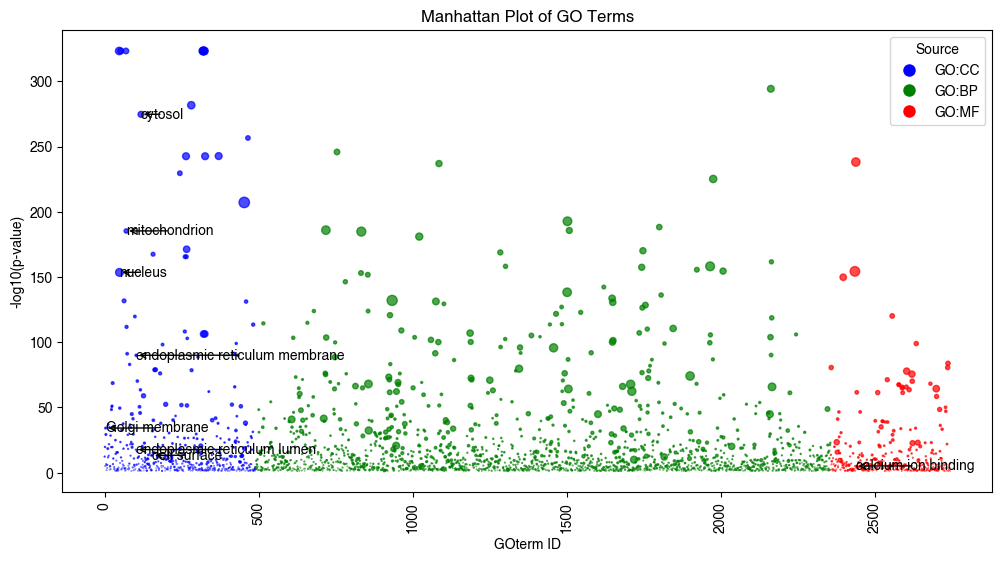

In [256]:
plt.figure(figsize=(12, 6))

for source in manhattan_gpro['source'].unique():
    subset = manhattan_gpro[manhattan_gpro['source'] == source]
    plt.scatter(subset['x'], subset['-log10(p_value_max)'], c=subset['color'], alpha=0.7, label=source, s = subset['gene_count']*0.01)


plt.xticks(rotation=90)
plt.xlabel('GOterm ID')
plt.ylabel('-log10(p-value)')
plt.title('Manhattan Plot of GO Terms')

for i, row in manhattan_gpro.iterrows():
    if manhattan_gpro['name'][i] in GOterm_list:
        plt.annotate(row['name'],
                     xy = [row['x'],row['-log10(p_value_max)']],
                     xytext=(row['x'] + 0.1, row['-log10(p_value_max)'] + 0.1),
                     fontsize=10, 
                     ha='left', 
                     va='center', 
                     arrowprops=dict(facecolor='black', arrowstyle='->'),
                     zorder=1000)


handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=source) for source, color in color_mapping.items()]
plt.legend(handles=handles, title='Source')

plt.show()